In [1]:
library(ggplot2)
library(GGally)
library(rpart)
library(e1071)



Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
data <- read.csv('/kaggle/input/boston-house-price-data/boston.csv', row.names=1)


**Crime Rate (CRIM): The average number of crimes per person in a town.**

**Residential Zone (ZN): The proportion of land designated for large residential lots over 25000 sq ft.**

**Business Proportion (INDUS): The proportion of non-retail business space in the town.**

**Proximity to River (CHAS): Whether or not the property is near the Charles River (1 for yes, 0 for no).**

**Air Quality (NOX): Concentration of harmful nitric oxides in the air.**

**Average Rooms (RM): The average number of rooms per house in the town.**

**Age of Houses (AGE): Proportion of houses built before 1940 that are still occupied by their owners.**

**Distance to Employment (DIS): Average distance to five major employment centers in Boston.**

**Highway Accessibility (RAD): How easily accessible the town is to radial highways.**

**Property Tax (TAX): The property tax rate per $10,000 valuation.**

**Student-Teacher Ratio (PTRATIO): The ratio of students to teachers in the town's schools.**

**Ethnicity Factor (B): A derived factor influenced by the proportion of Black residents in the town.**

**Lower Status Population (LSTAT): Percentage of the population with lower socioeconomic status.**

**Median Home Price (PRICE): The median value of homes that are occupied by their owners, measured in thousands of dollars.**


original research paper: https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y

In [3]:
shape <- dim(data)
cat("Shape of data:", shape[1], "rows and", shape[2], "columns.\n")

cat("\n","Column names of data:", names(data), "\n")

any_na <- any(is.na(data))
cat("\n","Any NaN values in data:", any_na, "\n")

any_duplicates <- any(duplicated(data))
cat("\n","Any duplicated values in data:", any_duplicates, "\n")


Shape of data: 506 rows and 14 columns.

 Column names of data: CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT PRICE 

 Any NaN values in data: FALSE 

 Any duplicated values in data: FALSE 


In [4]:
cat("Basic information about the data:\n")


cat("Structure of the data:\n")
str(data)


Basic information about the data:
Structure of the data:
'data.frame':	506 obs. of  14 variables:
 $ CRIM   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num  397 397 393 395 397 ...
 $ LSTAT  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ PRICE  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [5]:
cat("Summary statistics of the data:\n")
summary(data)

Summary statistics of the data:


      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [6]:
# Initialize a data frame to store outliers
outliers_df <- data.frame(Column = character(), Outliers = character(), stringsAsFactors = FALSE)

# Loop through each column
for (col in names(data)) {
  # Calculate the IQR
  Q1 <- quantile(data[[col]], 0.25)
  Q3 <- quantile(data[[col]], 0.75)
  IQR <- Q3 - Q1

  # Define lower and upper bounds for outliers
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR

  # Check for outliers
  outliers <- data[[col]][data[[col]] < lower_bound | data[[col]] > upper_bound]

  # If outliers are found, add them to the outliers data frame
  if (length(outliers) > 0) {
    outliers_df <- rbind(outliers_df, data.frame(Column = col, Outliers = paste(outliers, collapse = ", "), stringsAsFactors = FALSE))
  }
}

# Print the outliers in a table
if (nrow(outliers_df) == 0) {
  cat("No outliers found in any column.\n")
} else {
  library(knitr)
  knitr::kable(outliers_df, caption = "Outliers in the Dataset")
}




Table: Outliers in the Dataset

|Column  |Outliers                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|:-------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
# Calculate the IQR for each column
Q1 <- apply(data, 2, quantile, probs = 0.25)
Q3 <- apply(data, 2, quantile, probs = 0.75)
IQR <- Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Identify rows with outliers in any column
outlier_rows <- apply(data, 1, function(row) any(row < lower_bound | row > upper_bound))

# Remove outliers by subsetting the data
clean_data <- data[!outlier_rows, ]

# Display the dimensions of the original and cleaned datasets
cat("Original dataset dimensions:", dim(data), "\n")
cat("Cleaned dataset dimensions:", dim(clean_data), "\n")


Original dataset dimensions: 506 14 
Cleaned dataset dimensions: 268 14 


In [8]:
cat("First few rows of the data:\n")
head(data)


First few rows of the data:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


# DATA TRANSFORMATION TECHNIQUES


 # Standardization

In [9]:

# Standardization function

# standardize <- function(x) {
#   (x - mean(x, na.rm = TRUE)) / sd(x, na.rm = TRUE)
# }

# standardized_data <- as.data.frame(lapply(data, function(x) {
#   if(is.numeric(x)) {
#     standardize(x)
#   } else {
#     x
#   }
# }))
# standardized_data$CHAS <- data$CHAS
#Outliers=238

# Normalization


In [10]:

# # Normalization function
# normalize <- function(x) {
#   (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
# }

# # Apply normalization to numeric columns in the data frame
# normalized_data <- as.data.frame(lapply(data, function(x) {
#   if(is.numeric(x)) {
#     normalize(x)
#   } else {
#     x
#   }
# }))
# normalized_data$CHAS <- data$CHAS
# Outliers=238



# Log Transformation

In [11]:
log_transformed_data <- data.frame(CHAS = data$CHAS)
for (column in names(data)) {
  if (column != 'CHAS') {
    log_transformed_data[, column] <- ifelse(data[, column] == 0, 0.00000001, log(data[, column]))
  }
}
#Outliers=174


# Winsorization

In [12]:
# winsorize <- function(x, winsor_value) {
#   # Calculate the winsorized_data values
#   winsorized_data_values <- ifelse(x > quantile(x, 1 - winsor_value),
#                             quantile(x, 1 - winsor_value),
#                             ifelse(x < quantile(x, winsor_value),
#                                    quantile(x, winsor_value),
#                                    x))
#   return(winsorized_data_values)
# }

# # Winsorize the data
# winsorized_data <- data.frame(CHAS = data$CHAS)
# for (column in names(data)) {
#   if (column != 'CHAS') {
#     winsorized_data[, column] <- winsorize(data[, column], winsor_value = 0.05)
#   }
# }
#outliers=229

In [13]:
cat("First few rows of the data:\n")
head(log_transformed_data)

First few rows of the data:


,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,-5.064036,2.89037176,0.8372475,-0.6198967,1.883275,4.177459,1.408545,0.0000000,5.690359,2.727853,5.983684,1.605430,3.178054
2,0,-3.600502,0.00000001,1.9558605,-0.7571525,1.859574,4.368181,1.602836,0.6931472,5.488938,2.879198,5.983684,2.212660,3.072693
3,0,-3.601235,0.00000001,1.9558605,-0.7571525,1.971996,4.112512,1.602836,0.6931472,5.488938,2.879198,5.973377,1.393766,3.546740
4,0,-3.430523,0.00000001,0.7793249,-0.7808861,1.945624,3.824284,1.802073,1.0986123,5.402677,2.928524,5.977949,1.078410,3.508556
5,0,-2.672924,0.00000001,0.7793249,-0.7808861,1.966693,3.992681,1.802073,1.0986123,5.402677,2.928524,5.983684,1.673351,3.589059
6,0,-3.511570,0.00000001,0.7793249,-0.7808861,1.860975,4.072440,1.802073,1.0986123,5.402677,2.928524,5.976655,1.650580,3.356897


In [14]:

# Initialize a data frame to store outliers
outliers_df <- data.frame(Column = character(), Outliers = character(), stringsAsFactors = FALSE)

# Loop through each column
for (col in names(log_transformed_data)) {
  # Calculate the IQR
  Q1 <- quantile(log_transformed_data[[col]], 0.25)
  Q3 <- quantile(log_transformed_data[[col]], 0.75)
  IQR <- Q3 - Q1

  # Define lower and upper bounds for outliers
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR

  # Check for outliers
  outliers <- log_transformed_data[[col]][data[[col]] < lower_bound | data[[col]] > upper_bound]

  # If outliers are found, add them to the outliers data frame
  if (length(outliers) > 0) {
    outliers_df <- rbind(outliers_df, data.frame(Column = col, Outliers = paste(outliers, collapse = ", "), stringsAsFactors = FALSE))
  }
}



In [15]:
# Calculate the IQR for each column
Q1 <- apply(log_transformed_data, 2, quantile, probs = 0.25)
Q3 <- apply(log_transformed_data, 2, quantile, probs = 0.75)
IQR <- Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Identify rows with outliers in any column
outlier_rows <- apply(log_transformed_data, 1, function(row) any(row < lower_bound | row > upper_bound))

# Remove outliers by subsetting the data
clean_data <- log_transformed_data[!outlier_rows, ]
outliers_in_data <- log_transformed_data[outlier_rows, ]
# Display the dimensions of the original and cleaned datasets
cat("Original dataset dimensions:", dim(log_transformed_data), "\n")
cat("Cleaned dataset dimensions:", dim(clean_data), "\n")
cat("Outiers available:",dim(outliers_in_data),"\n")

Original dataset dimensions: 506 14 
Cleaned dataset dimensions: 332 14 
Outiers available: 174 14 


# **Exploratory Data Analysis**


# Univariate

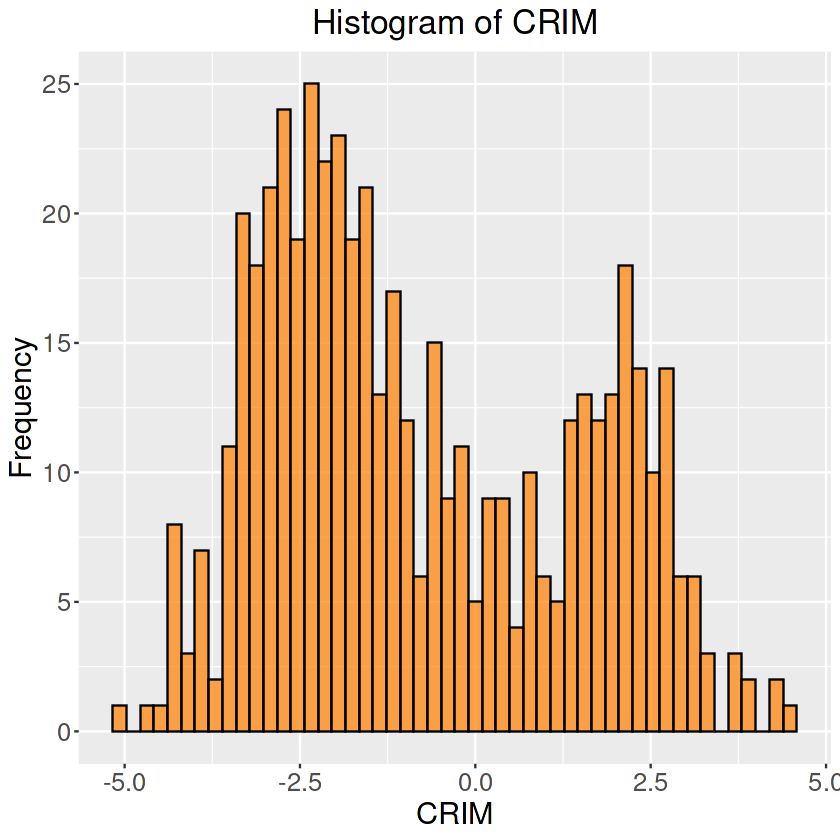

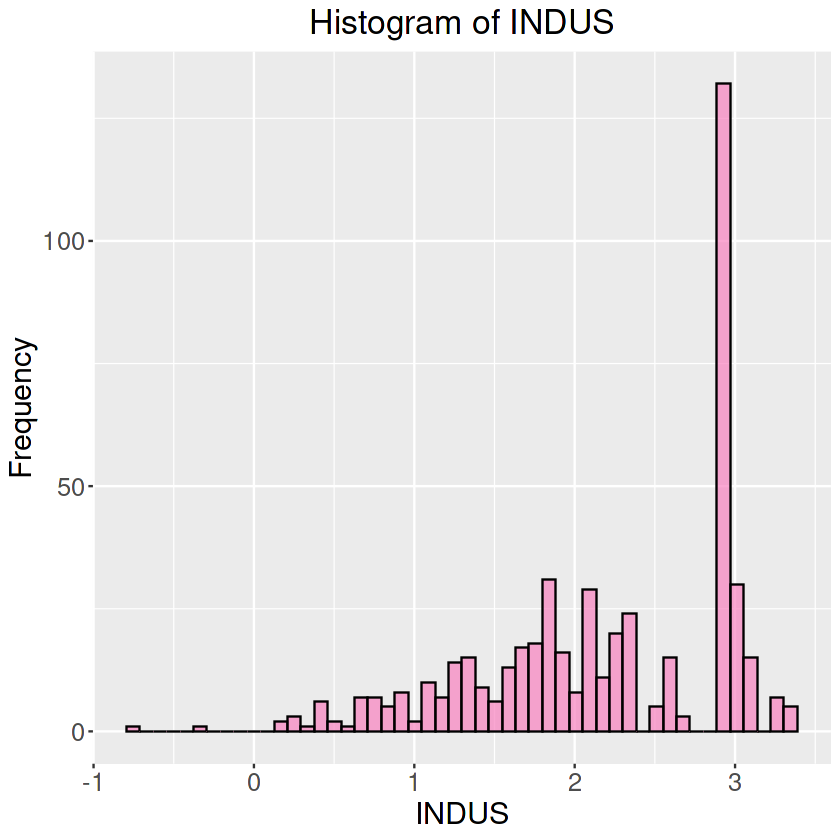

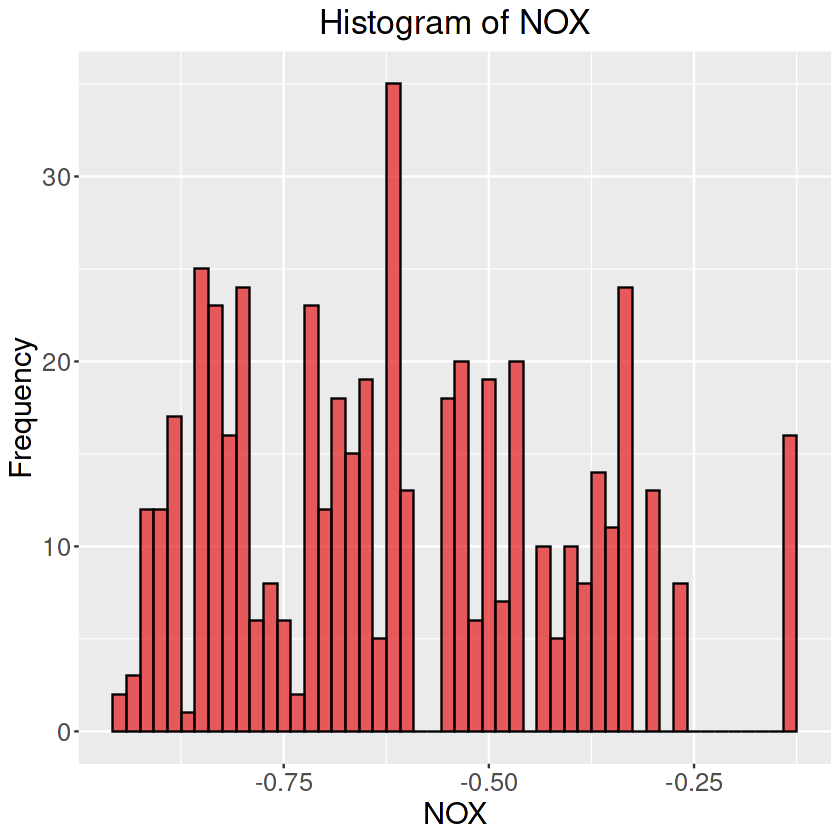

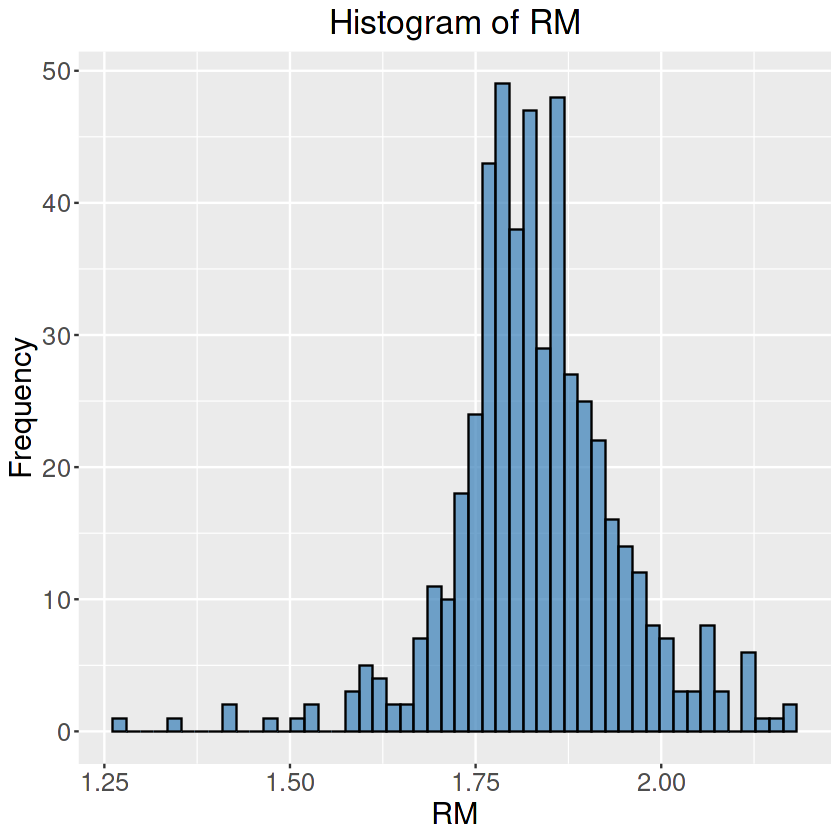

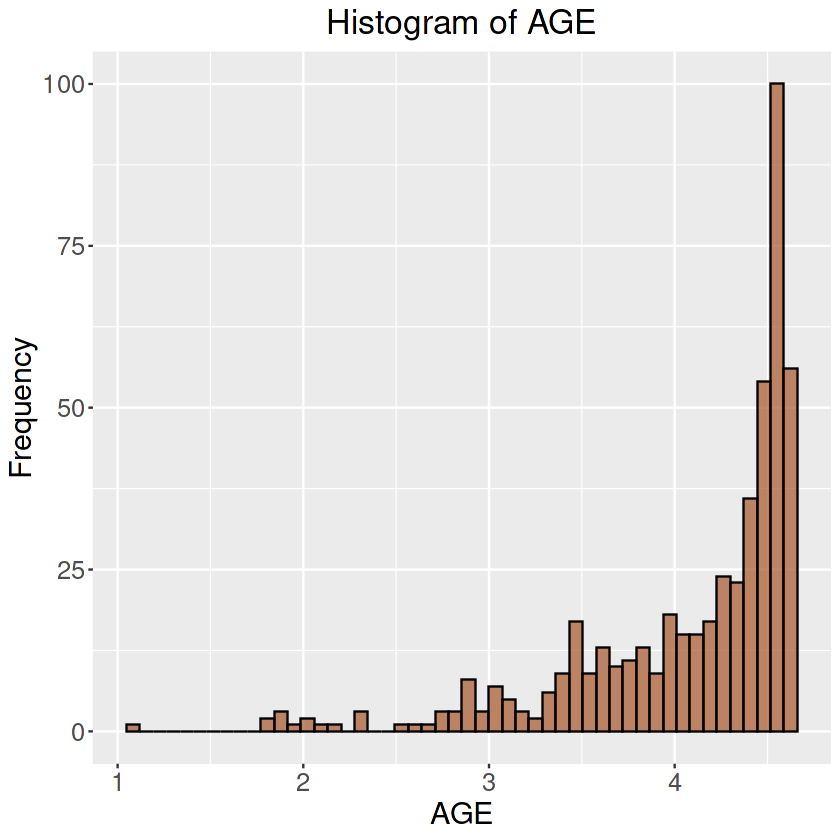

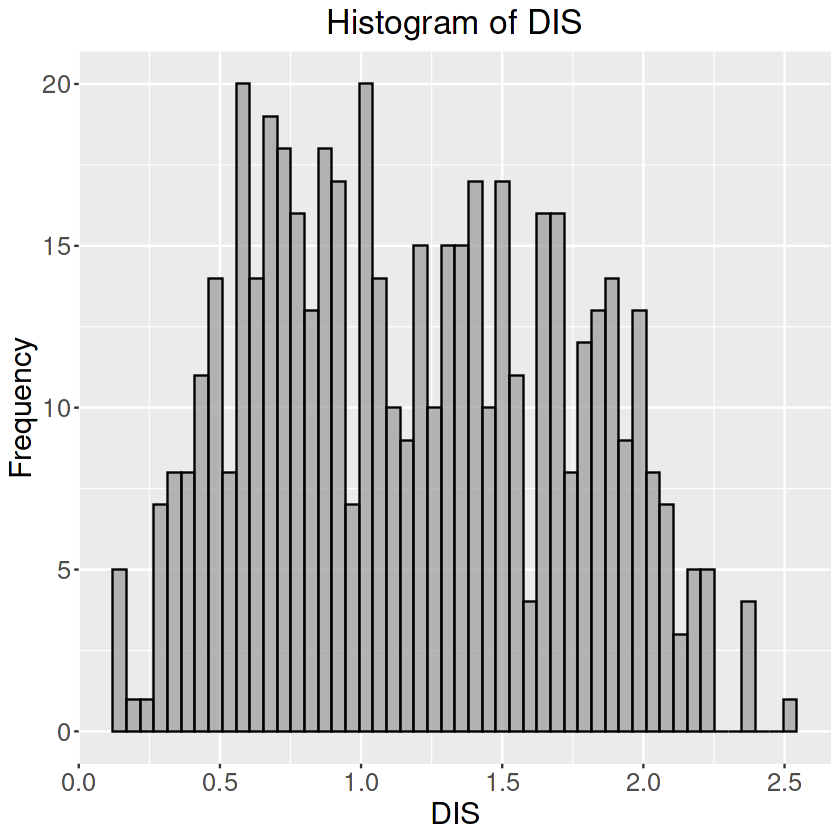

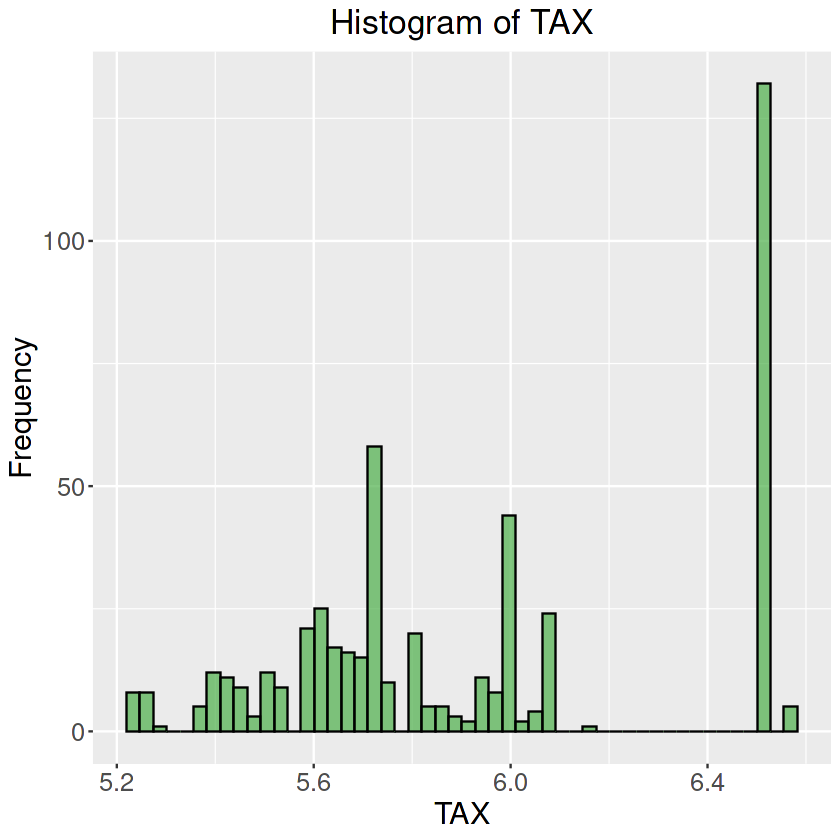

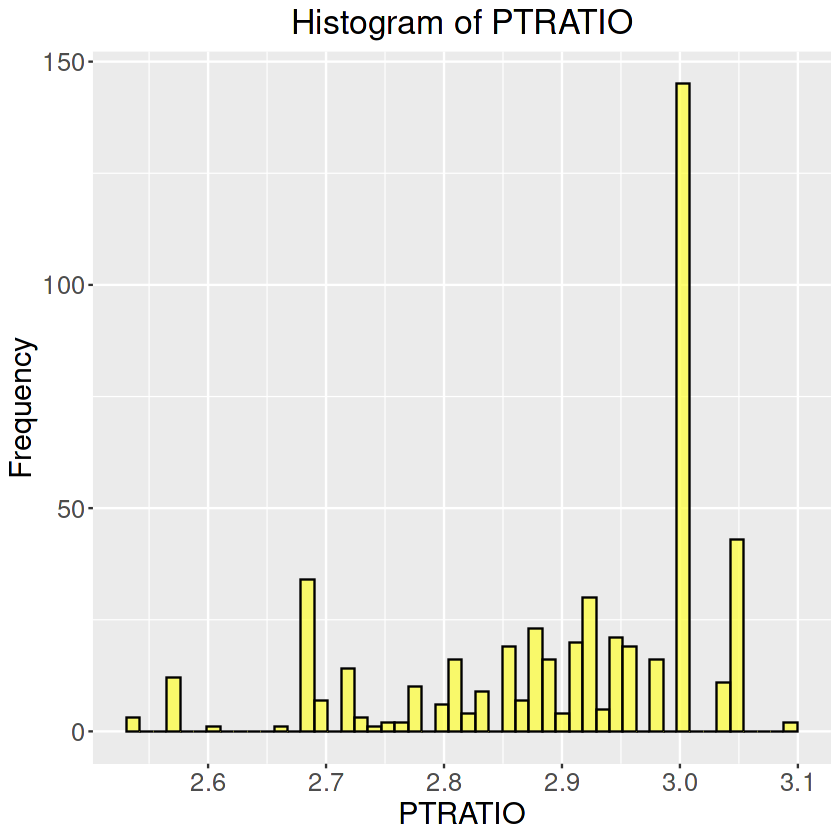

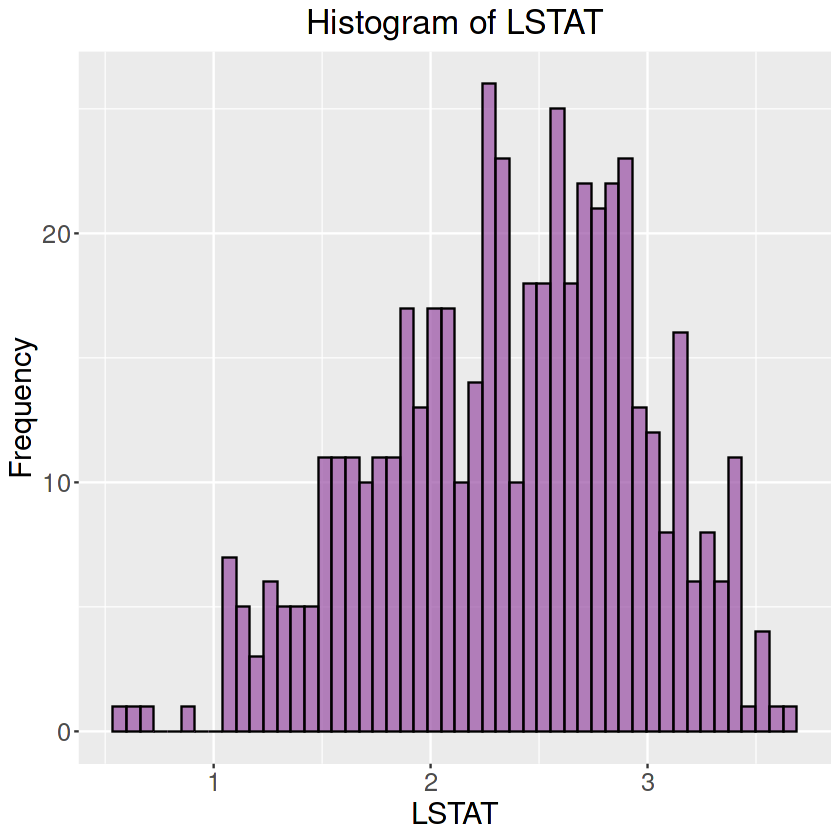

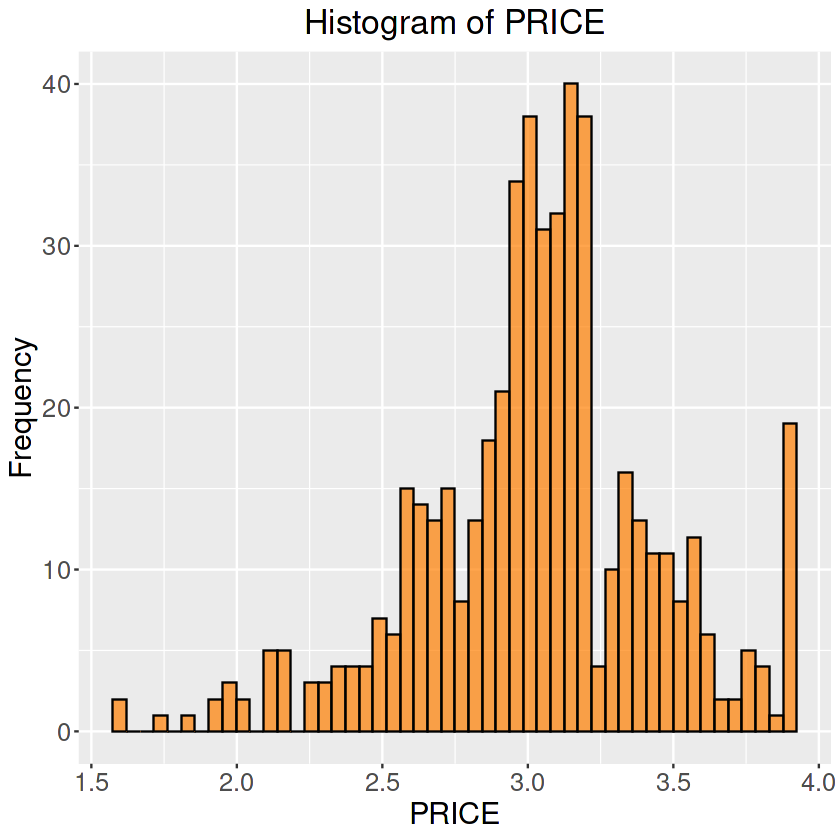

In [16]:
library(RColorBrewer)


color_palette <- brewer.pal(9, "Set1")


selected_columns <- names(log_transformed_data)[!(names(log_transformed_data) %in% c('B', 'RAD', 'CHAS','ZN'))]


num_columns <- length(selected_columns)
num_colors <- min(num_columns, length(color_palette))


sampled_colors <- sample(color_palette, num_colors)


for (i in seq_along(selected_columns)) {
  column <- selected_columns[i]
  color <- sampled_colors[i %% num_colors + 1]  


  plot <- ggplot(log_transformed_data, aes(x = .data[[column]])) +
    geom_histogram(color = "black", fill = color, alpha = 0.7, bins = 50) +
    labs(title = paste("Histogram of", column),
         x = column,
         y = "Frequency") +
    theme(plot.title = element_text(size = 20, hjust = 0.5),
          axis.title = element_text(size = 18),
          axis.text = element_text(size = 15))

 
  print(plot)
}

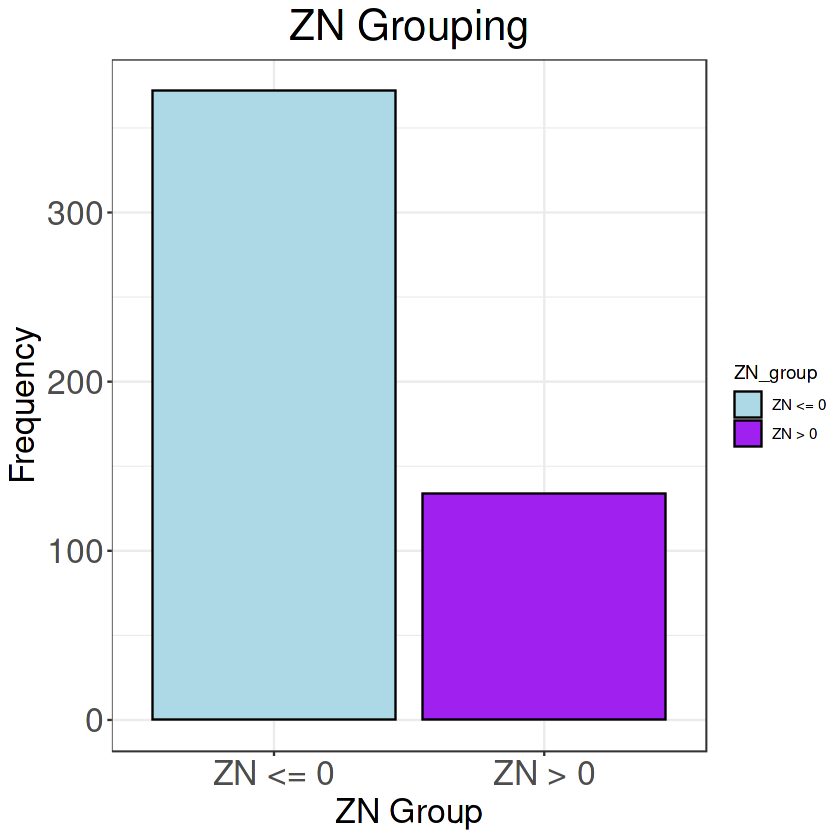

In [17]:
threshold <- 0.000001

log_transformed_data$ZN_group <- ifelse(log_transformed_data$ZN > threshold, "ZN > 0", "ZN <= 0")


data_zn <- as.data.frame(table(log_transformed_data$ZN_group))

names(data_zn) <- c("ZN_group", "Count")

ggplot(data_zn, aes(x = ZN_group, y = Count, fill = ZN_group)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = c("ZN > 0" = "purple", "ZN <= 0" = "lightblue")) +  
  labs(title = "ZN Grouping",
       x = "ZN Group",
       y = "Frequency") +
  theme_bw() +
  theme(plot.title = element_text(size = 25, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 20))

In [18]:
log_transformed_data <- subset(log_transformed_data, select = -c(ZN_group))

In [19]:
print(unique(log_transformed_data$RAD))


[1] 0.0000000 0.6931472 1.0986123 1.6094379 1.3862944 2.0794415 1.7917595
[8] 1.9459101 3.1780538


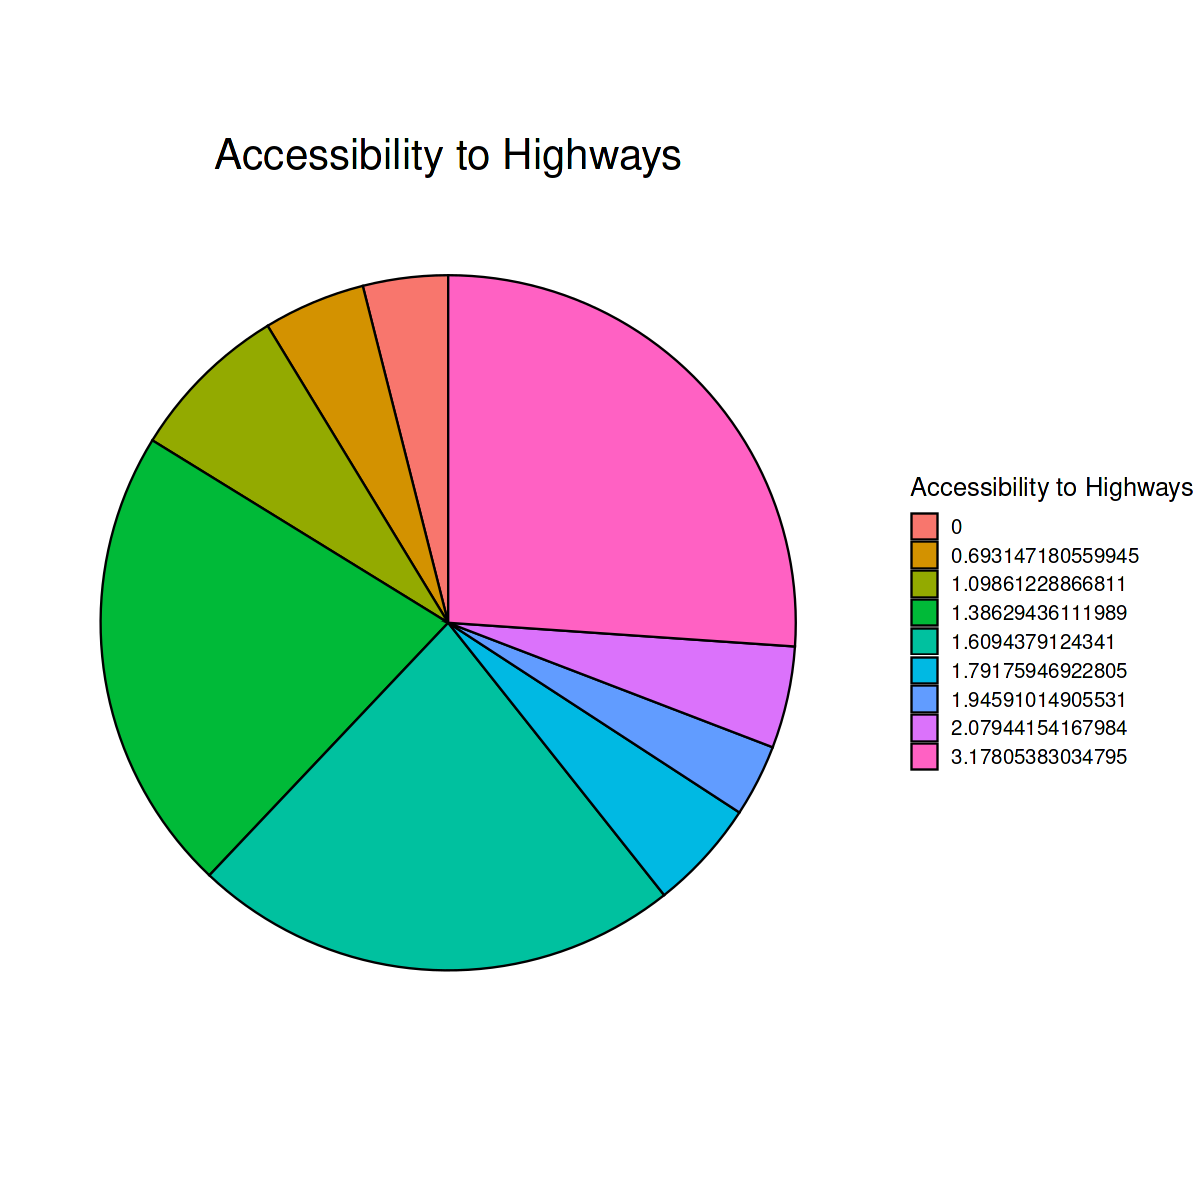

In [20]:
options(repr.plot.width=10, repr.plot.height=10)


total_houses <- nrow(log_transformed_data)


ggplot(log_transformed_data, aes(x = factor(total_houses), fill = factor(RAD))) +
  geom_bar(width = 0.5, color = "black") +
  coord_polar(theta = "y") +
  labs(title = "Accessibility to Highways",
       fill = "Accessibility to Highways",
       x = "Number of Houses (Count)",  
       y = NULL) +
  theme_bw()+  
  theme(plot.title = element_text(size = 25, hjust = 0.5),
        legend.title = element_text(size = 15),
        legend.text = element_text(size = 12)) +
  theme(axis.title = element_blank(),  
        axis.text = element_blank(),   
        axis.ticks = element_blank(),  
        panel.border = element_blank(),  
        panel.grid = element_blank())

In [21]:
sum(is.na(log_transformed_data))


[1] 0

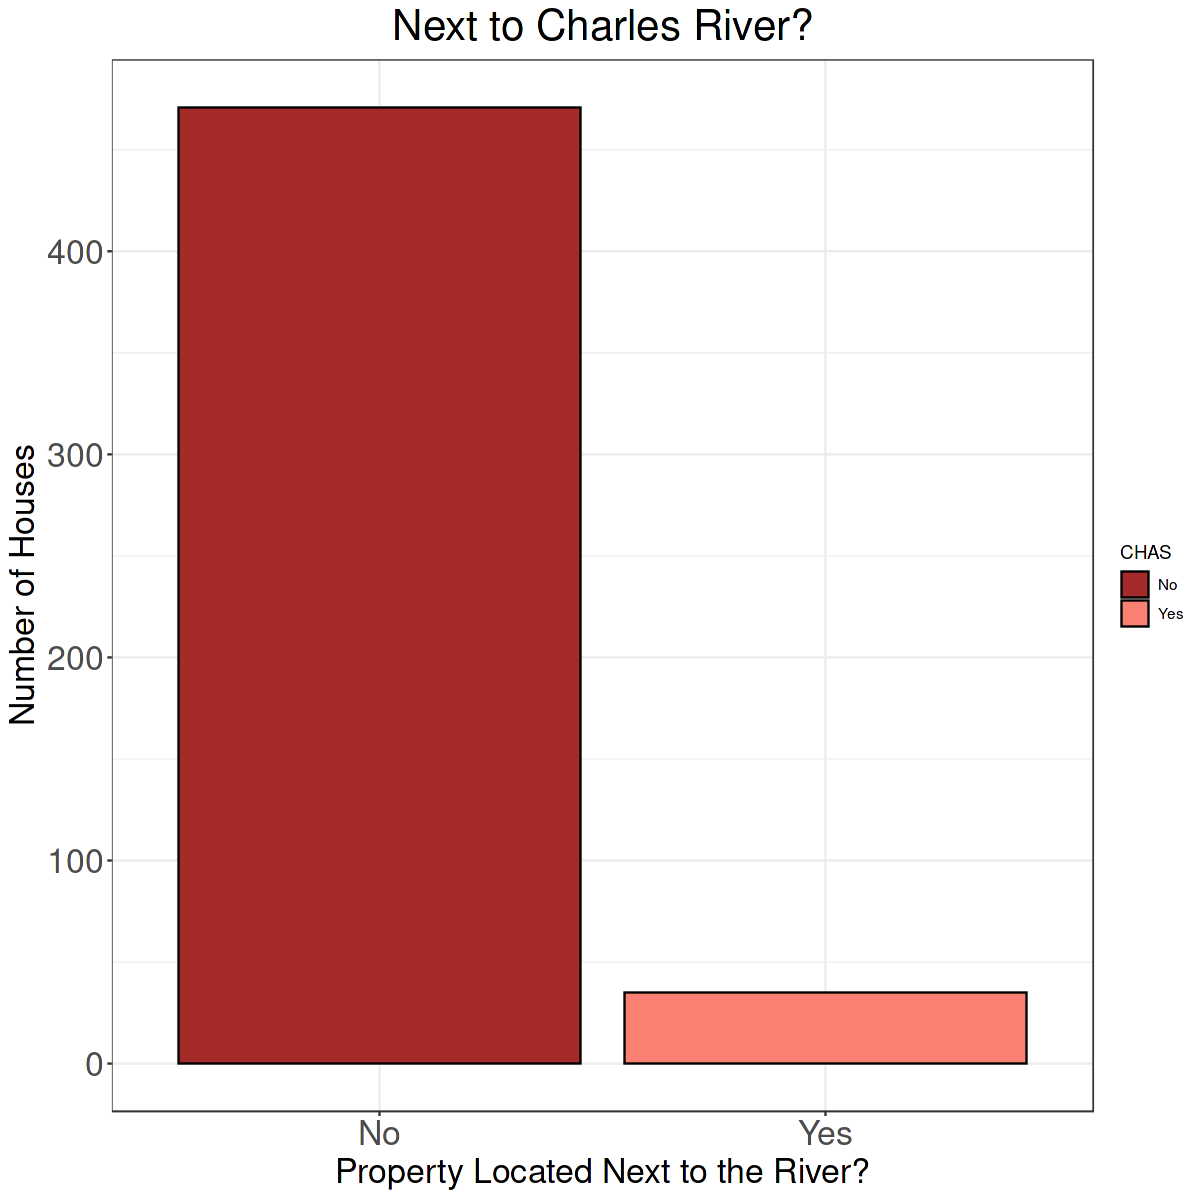

In [22]:
data_chas <- as.data.frame(table(log_transformed_data$CHAS))

names(data_chas) <- c("CHAS", "Count")

data_chas$CHAS <- factor(data_chas$CHAS, levels = c(0, 1), labels = c("No", "Yes"))

ggplot(data_chas, aes(x = CHAS, y = Count, fill = CHAS)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = c("No" = "brown", "Yes" = "salmon")) +  
  labs(title = "Next to Charles River?",
       x = "Property Located Next to the River?",
       y = "Number of Houses") +
  theme_bw() +
  theme(plot.title = element_text(size = 25, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 20))

In [23]:
sum(log_transformed_data$B < 5)


[1] 36

In [24]:
log_transformed_data$B_group <- ifelse(log_transformed_data$B < 5, "B < 5", "B >= 5")

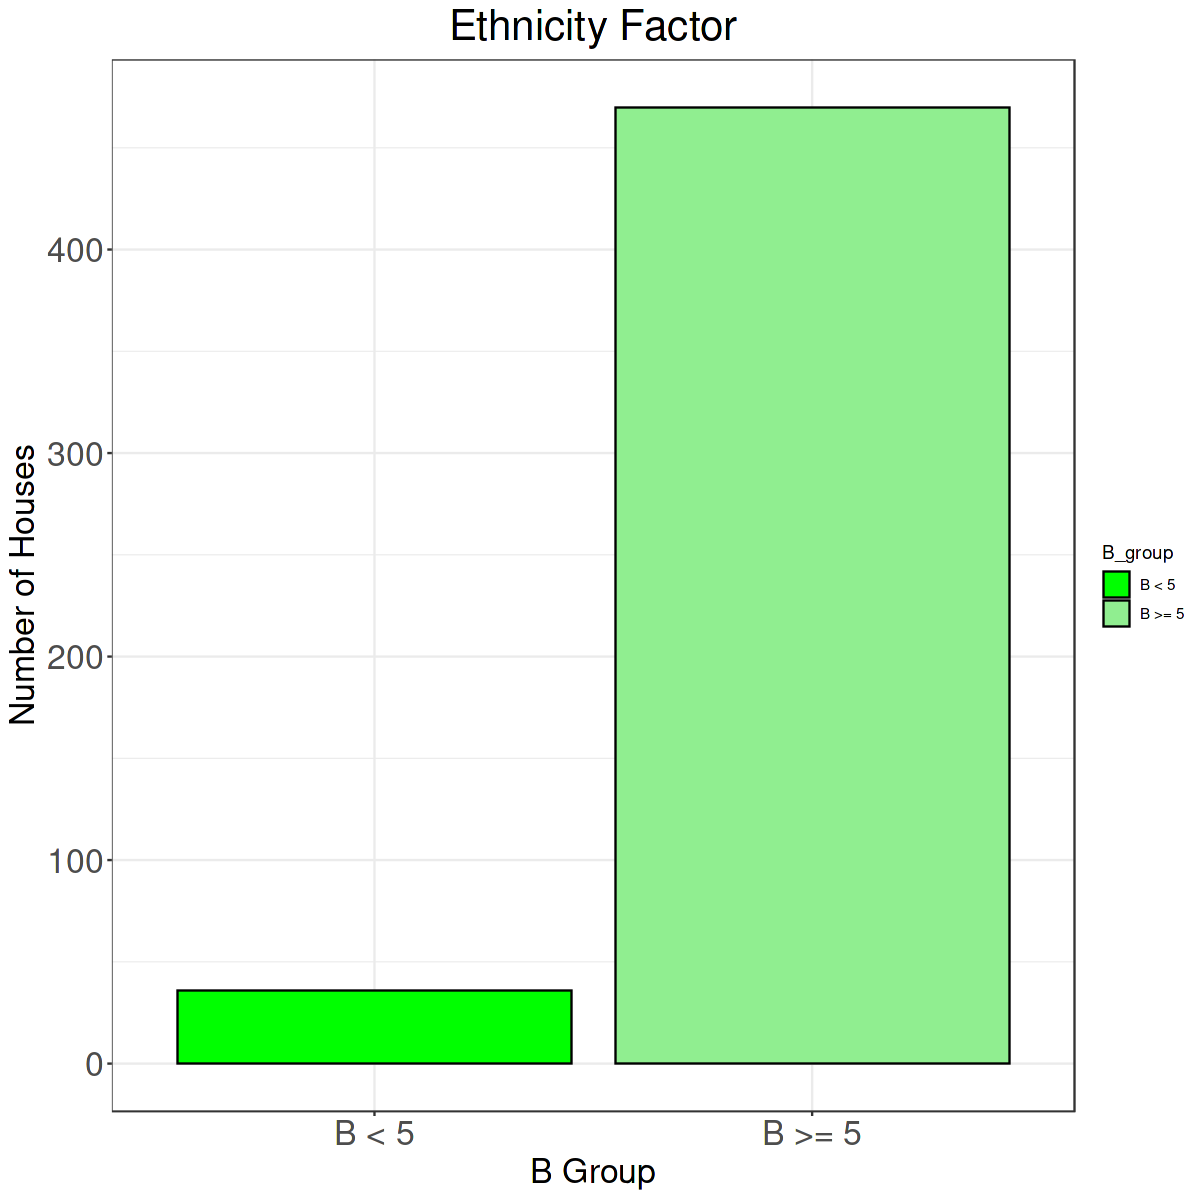

In [25]:
data_b <- as.data.frame(table(log_transformed_data$B_group))

names(data_b) <- c("B_group", "Count")


ggplot(data_b, aes(x = B_group, y = Count, fill = B_group)) +
  geom_bar(stat = "identity", color = "black") +
  scale_fill_manual(values = c("B < 5" = "green", "B >= 5" = "lightgreen")) +  # Change colors here
  labs(title = "Ethnicity Factor",
       x = "B Group",
       y = "Number of Houses") +
  theme_bw() +
  theme(plot.title = element_text(size = 25, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text = element_text(size = 20))

# Bivariate

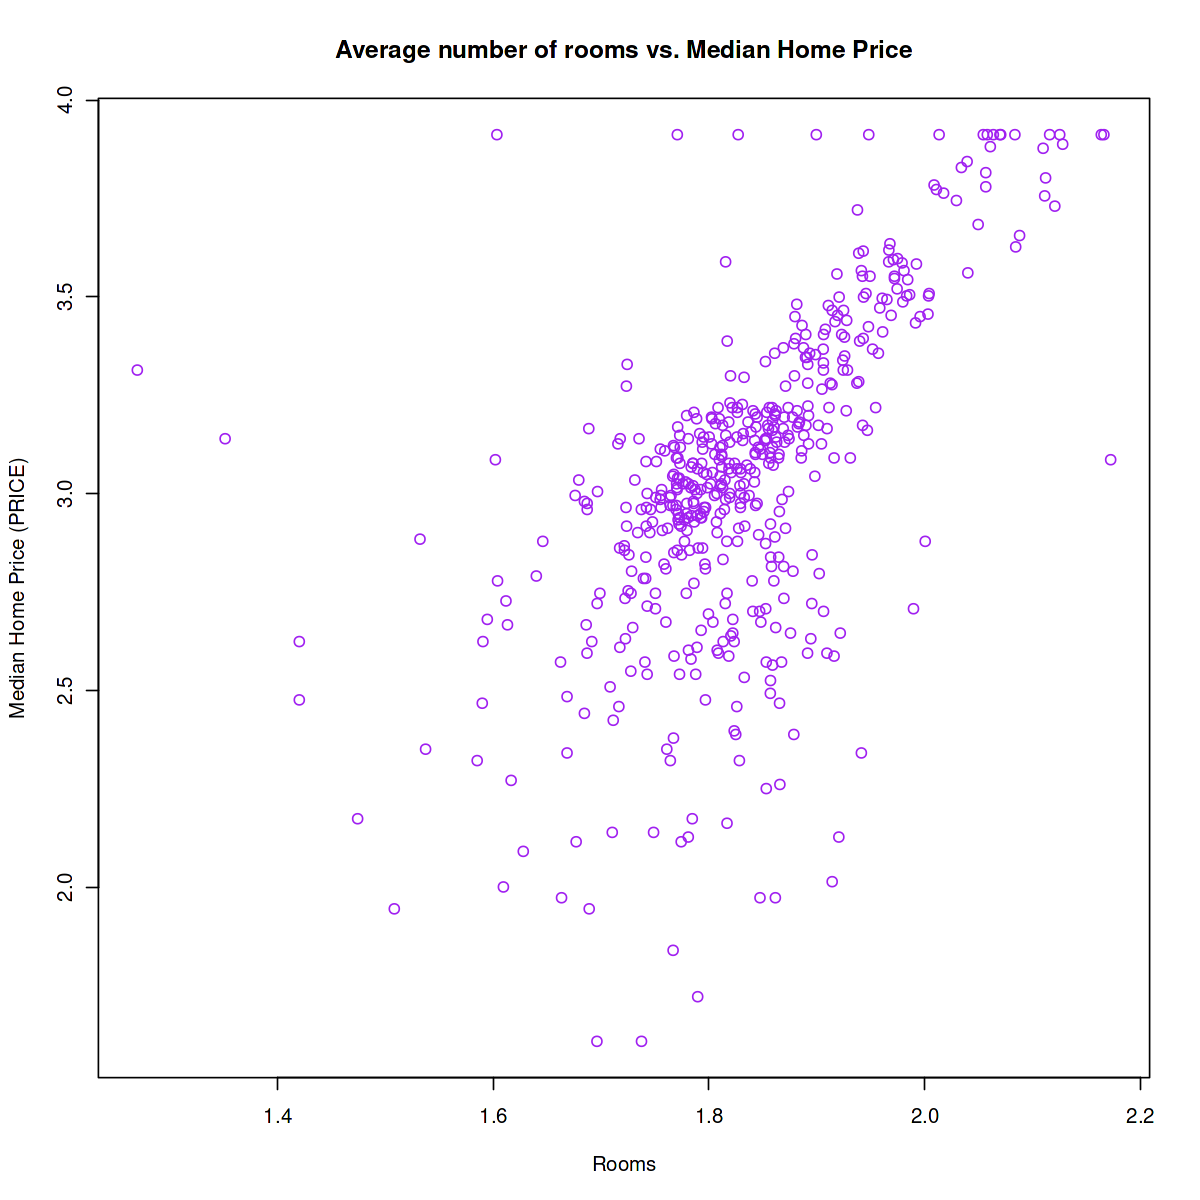

In [26]:
log_transformed_data$RM <- log(data$RM)
log_transformed_data$PRICE <- log(data$PRICE)

plot(log_transformed_data$RM, log_transformed_data$PRICE, 
     xlab = "Rooms", 
     ylab = "Median Home Price (PRICE)", 
     main = "Average number of rooms vs. Median Home Price",
    col = "purple")
log_transformed_data$RM <- log(data$RM)
log_transformed_data$PRICE <- log(data$PRICE)

plot(log_transformed_data$RM, log_transformed_data$PRICE, 
     xlab = "Rooms", 
     ylab = "Median Home Price (PRICE)", 
     main = "Average number of rooms vs. Median Home Price",
    col = "purple")

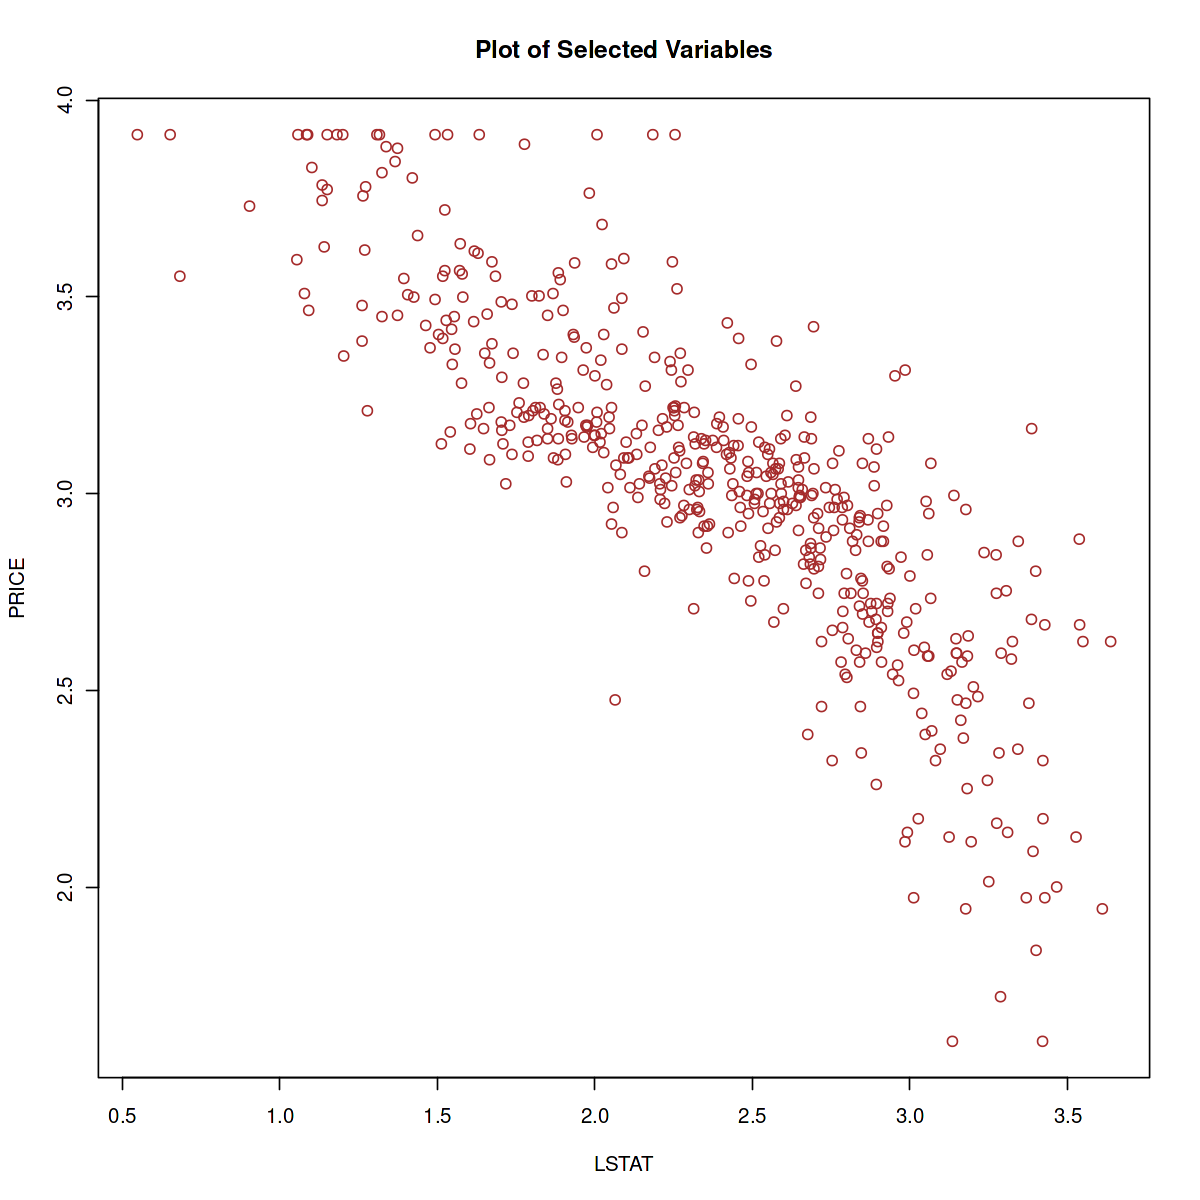

In [27]:
log_transformed_data <- log_transformed_data

columns <- c("LSTAT", "PRICE")

plot(log_transformed_data[columns], 
      main = "Plot of Selected Variables",
      col = "brown")

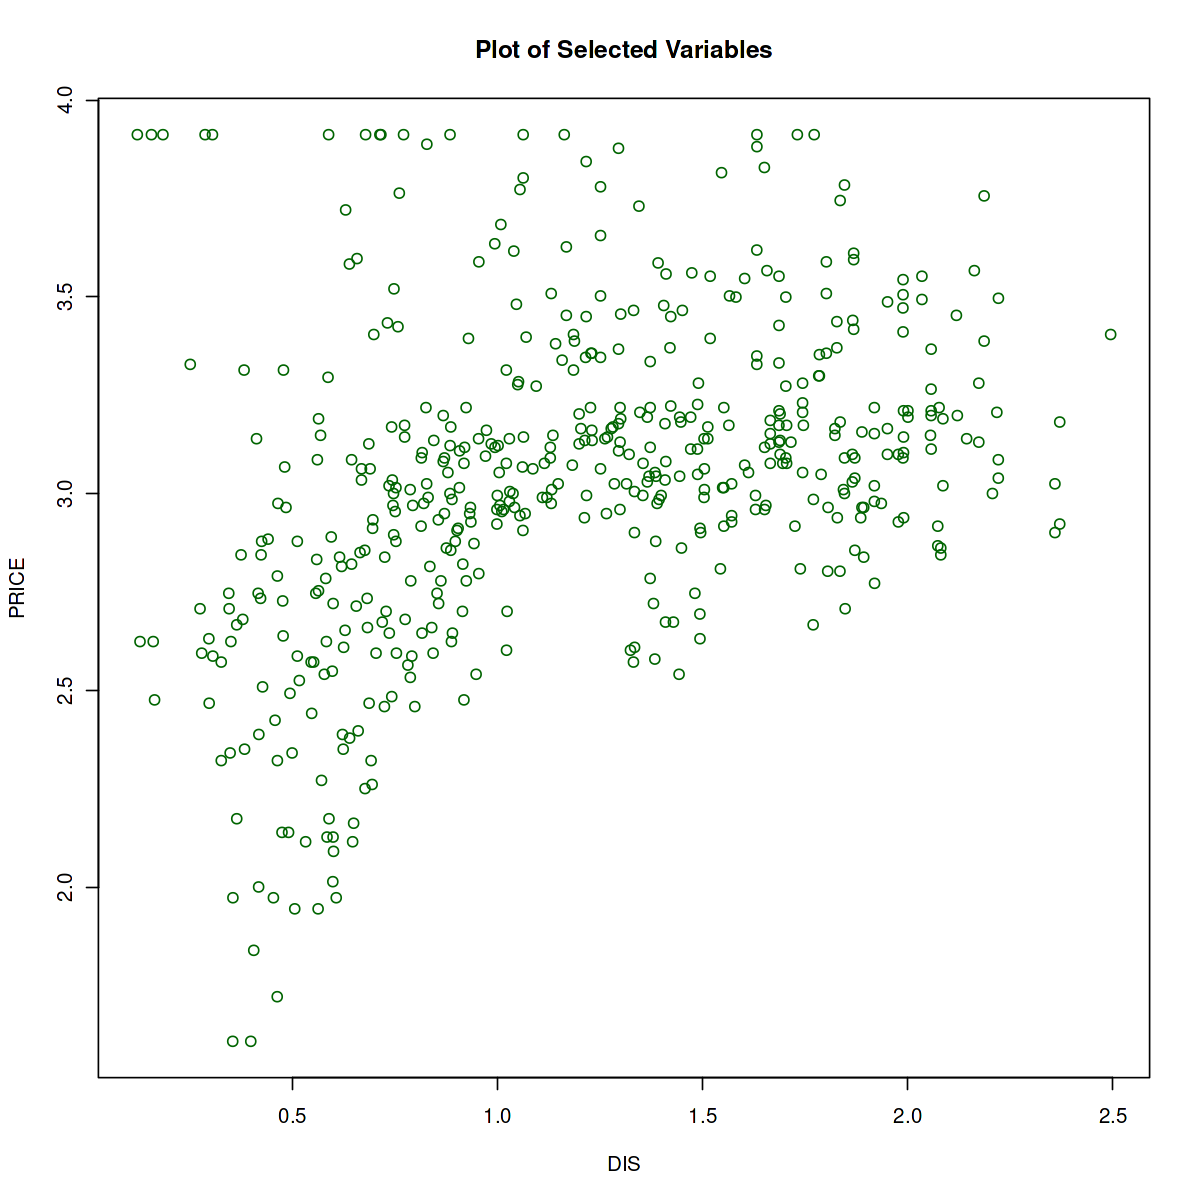

In [28]:
log_transformed_data <- log_transformed_data

columns <- c("DIS", "PRICE")


plot(log_transformed_data[columns], 
      main = "Plot of Selected Variables",
      col = "darkgreen")

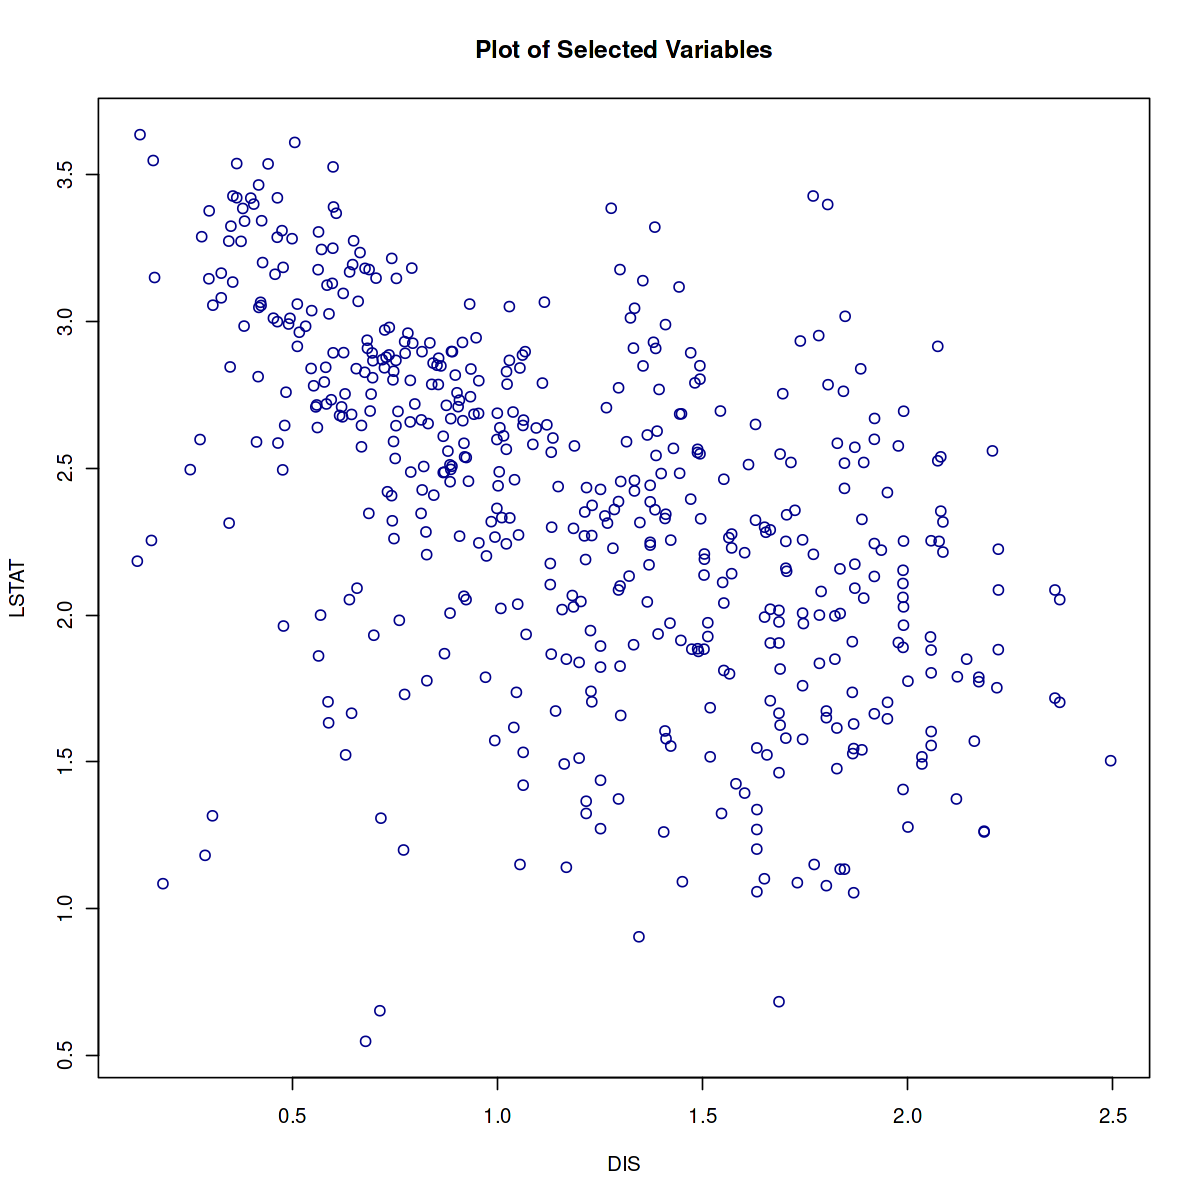

In [29]:
log_transformed_data <- log_transformed_data

columns <- c("DIS", "LSTAT")


plot(log_transformed_data[columns], 
      main = "Plot of Selected Variables",
      col = "darkblue")

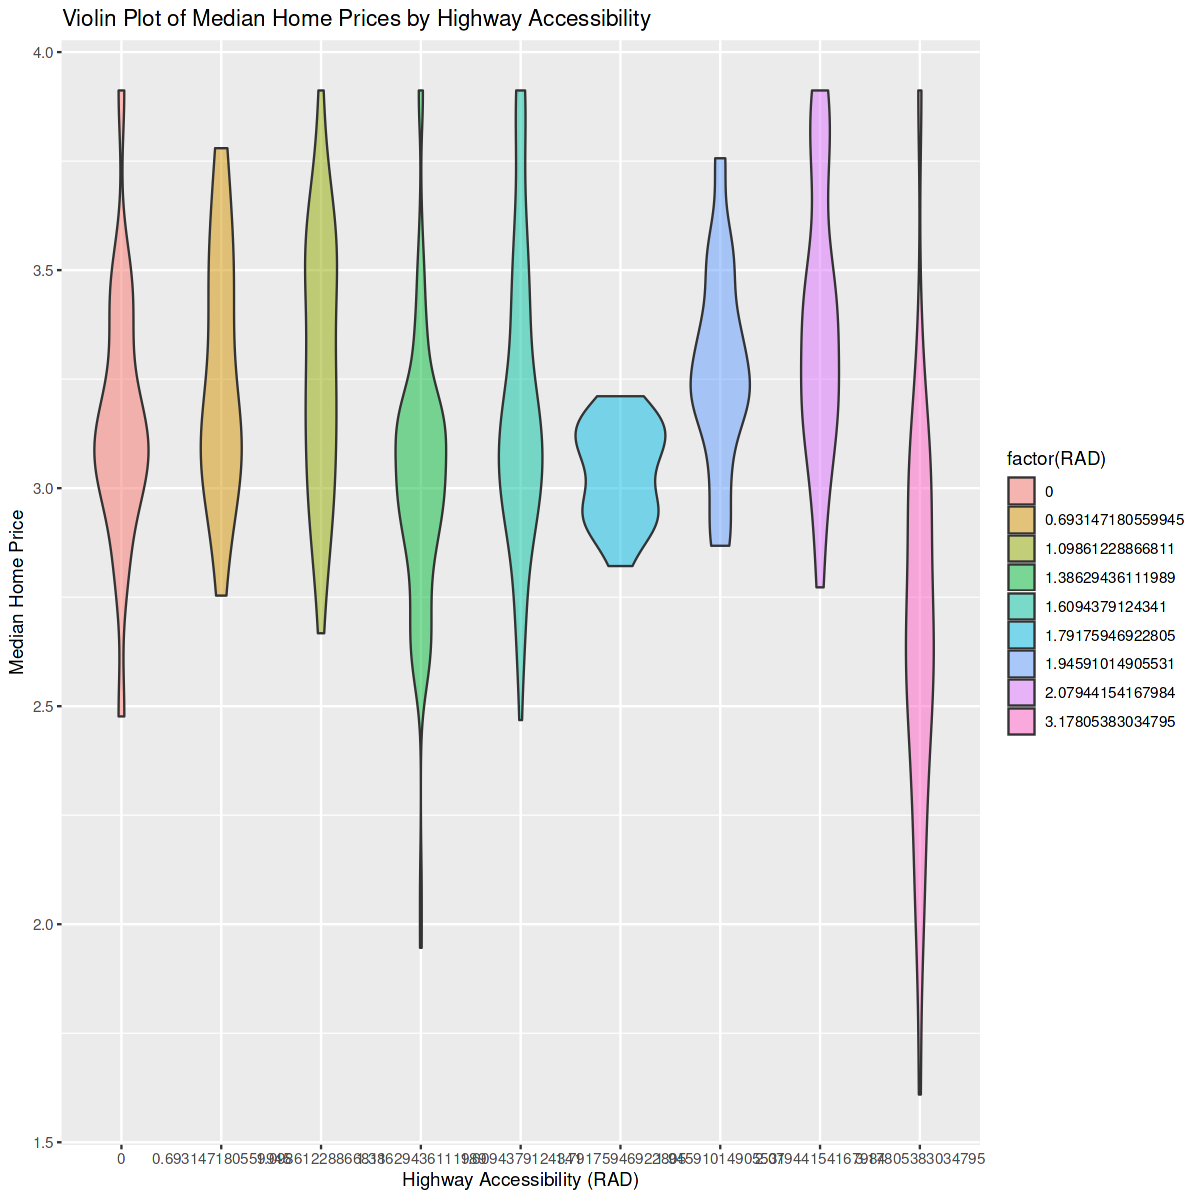

In [30]:
ggplot(log_transformed_data, aes(x = factor(RAD), y = PRICE, fill = factor(RAD))) +
  geom_violin(alpha = 0.5) +
  labs(x = "Highway Accessibility (RAD)", y = "Median Home Price") +
  ggtitle("Violin Plot of Median Home Prices by Highway Accessibility   ")

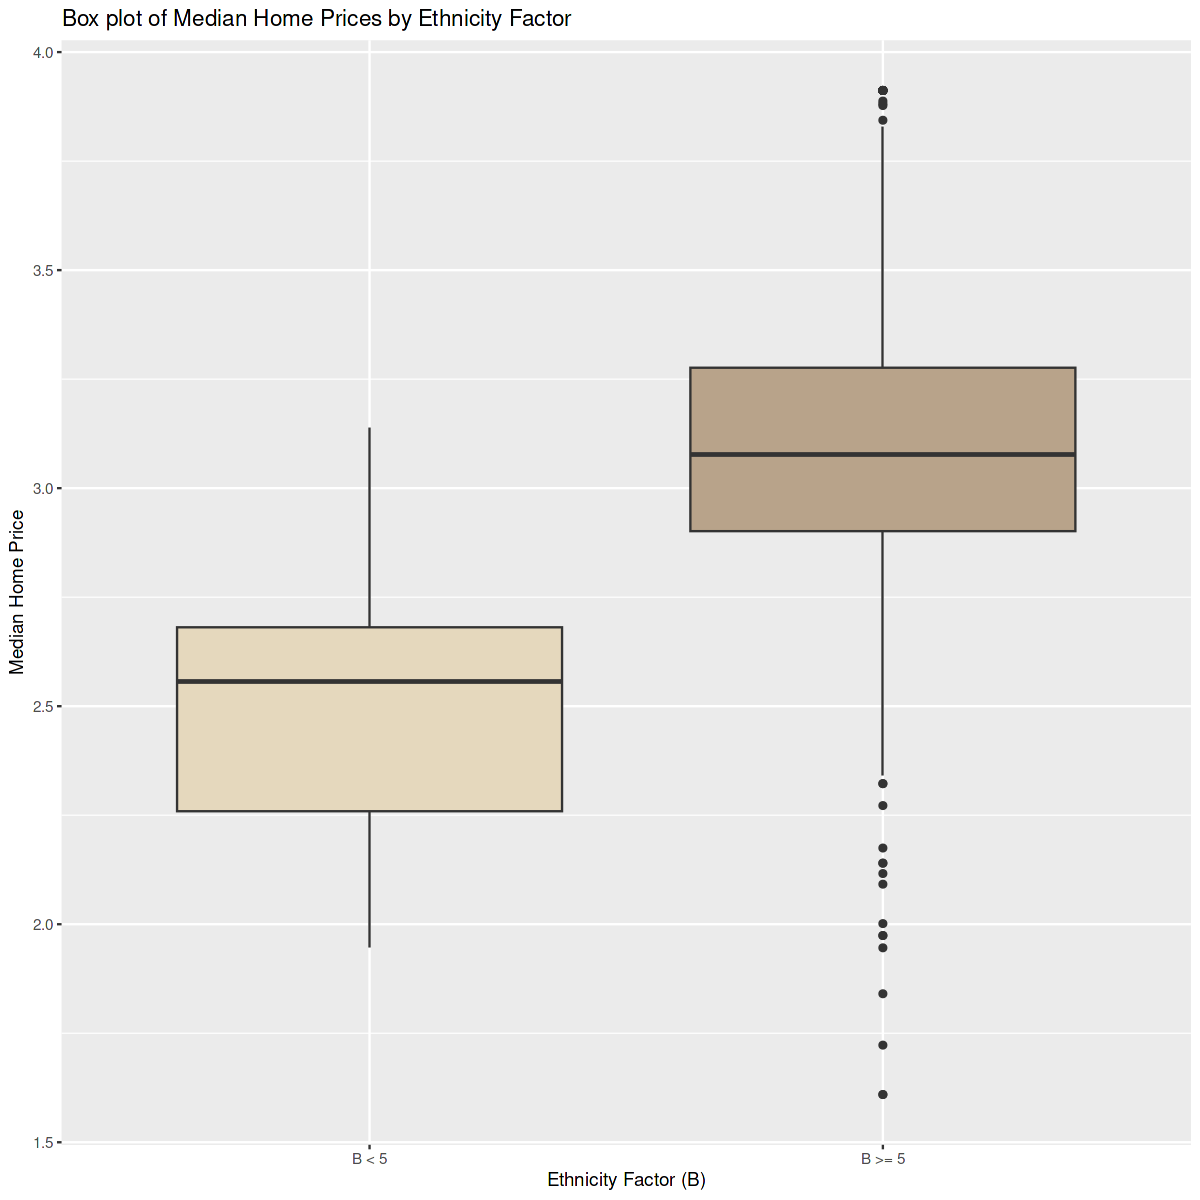

In [31]:
palette <- c("#E5D8BD", "#B8A38A")

ggplot(log_transformed_data, aes(x = factor(B_group), y = PRICE)) +
  geom_boxplot(fill = palette) +
  labs(x = "Ethnicity Factor (B)", y = "Median Home Price") +
  ggtitle("Box plot of Median Home Prices by Ethnicity Factor")

# Multivariate

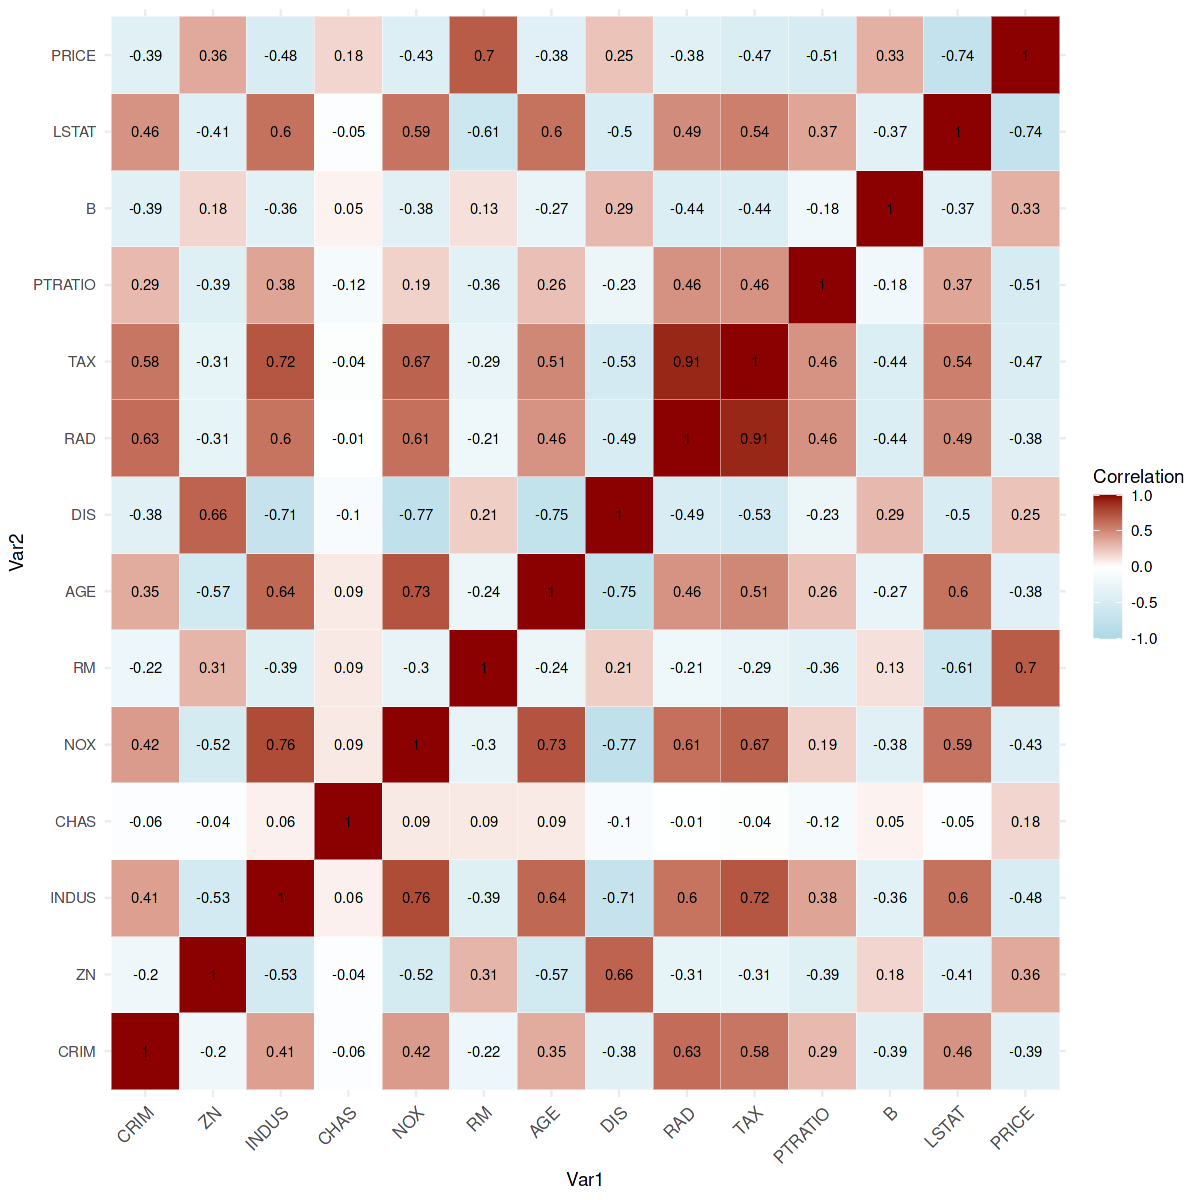

In [32]:
library(ggplot2)
library(reshape2) 


correlation_matrix <- cor(data[, c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE")])


ggplot(data = melt(correlation_matrix), aes(Var1, Var2, fill = value, label = round(value, 2))) +
  geom_tile(color = "white") +
  geom_text(color = "black", size = 3) +  
  scale_fill_gradient2(low = "lightblue", high = "darkred", mid = "white", midpoint = 0, limit = c(-1,1), space = "Lab", name = "Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1))

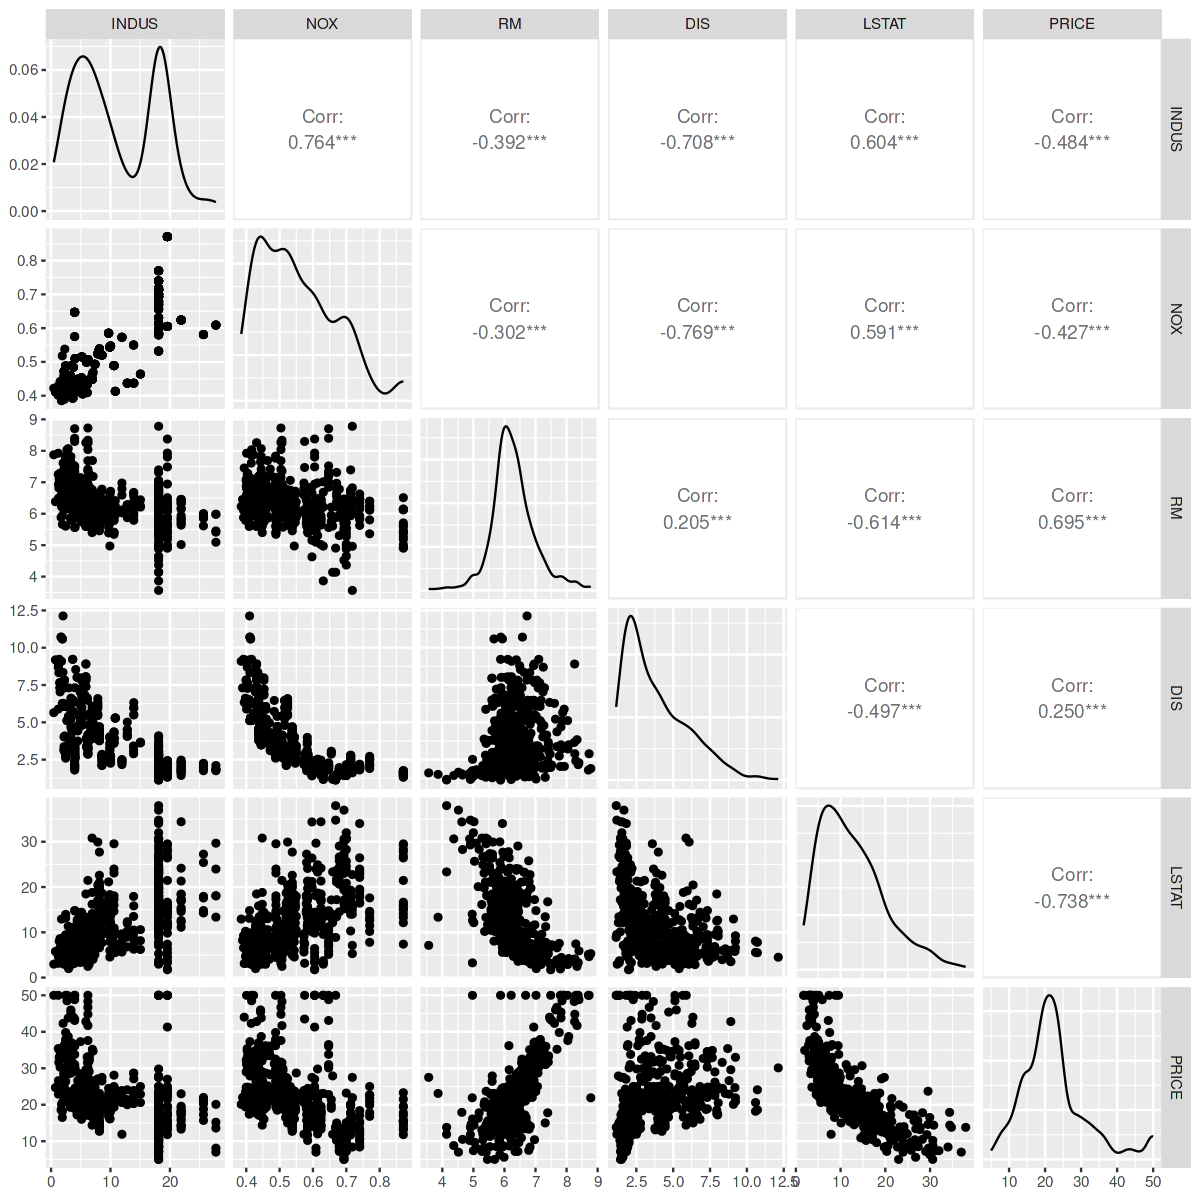

In [33]:
variables <- c("INDUS", "NOX", "RM", "DIS", "LSTAT", "PRICE")

ggpairs(data[variables])

# **CHAS Variances**

In [34]:
# Split the data into two groups based on CHAS
group0 <- log_transformed_data[log_transformed_data$CHAS == 0, "PRICE"]
group1 <- log_transformed_data[log_transformed_data$CHAS == 1, "PRICE"]

# Calculate the variance for each group
variance_group0 <- var(group0)
variance_group1 <- var(group1)

# Print the variances
cat("Variance for group with CHAS=0:", variance_group0, "\n")
cat("Variance for group with CHAS=1:", variance_group1, "\n")


Variance for group with CHAS=0: 0.1641629 
Variance for group with CHAS=1: 0.1500753 


# **Welch's t-test**

In [35]:
# Split the data into two groups based on CHAS
group0 <- log_transformed_data[log_transformed_data$CHAS == 0, "PRICE"]
group1 <- log_transformed_data[log_transformed_data$CHAS == 1, "PRICE"]

# Perform the t-test
t_test_result <- t.test(group0, group1, var.equal = FALSE)

# Print the result
print(t_test_result)



	Welch Two Sample t-test

data:  group0 and group1
t = -3.744, df = 39.733, p-value = 0.0005735
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3925812 -0.1172888
sample estimates:
mean of x mean of y 
 3.016879  3.271814 



In [36]:
qt(p=0.05/2, df=39.733, lower.tail = FALSE)

[1] 2.021499

# **Student's t-test**

In [37]:
# Split the data into two groups based on CHAS
group0 <- log_transformed_data[log_transformed_data$CHAS == 0, "PRICE"]
group1 <- log_transformed_data[log_transformed_data$CHAS == 1, "PRICE"]

# Perform the t-test
t_test_result <- t.test(group0, group1, var.equal = TRUE)

# Print the result
print(t_test_result)


	Two Sample t-test

data:  group0 and group1
t = -3.6018, df = 504, p-value = 0.0003473
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3939942 -0.1158758
sample estimates:
mean of x mean of y 
 3.016879  3.271814 



In [38]:
qt(p=0.05/2, df=504, lower.tail = FALSE)     

[1] 1.964682

# **RAD Variances**

# **Welcoxon Rank Sum Test**



In [39]:
# Split the data into two groups based on CHAS
group0 <- log_transformed_data[log_transformed_data$CHAS == 0, "PRICE"]
group1 <- log_transformed_data[log_transformed_data$CHAS == 1, "PRICE"]
mean0<-mean(group0)
mean1<-mean(group1)
variance0<-var(group0)
variance1<-var(group1)

cat("Mean for group with CHAS=0:", mean0, "\n")
cat("Mean for group with CHAS=1:", mean1, "\n")


Mean for group with CHAS=0: 3.016879 
Mean for group with CHAS=1: 3.271814 


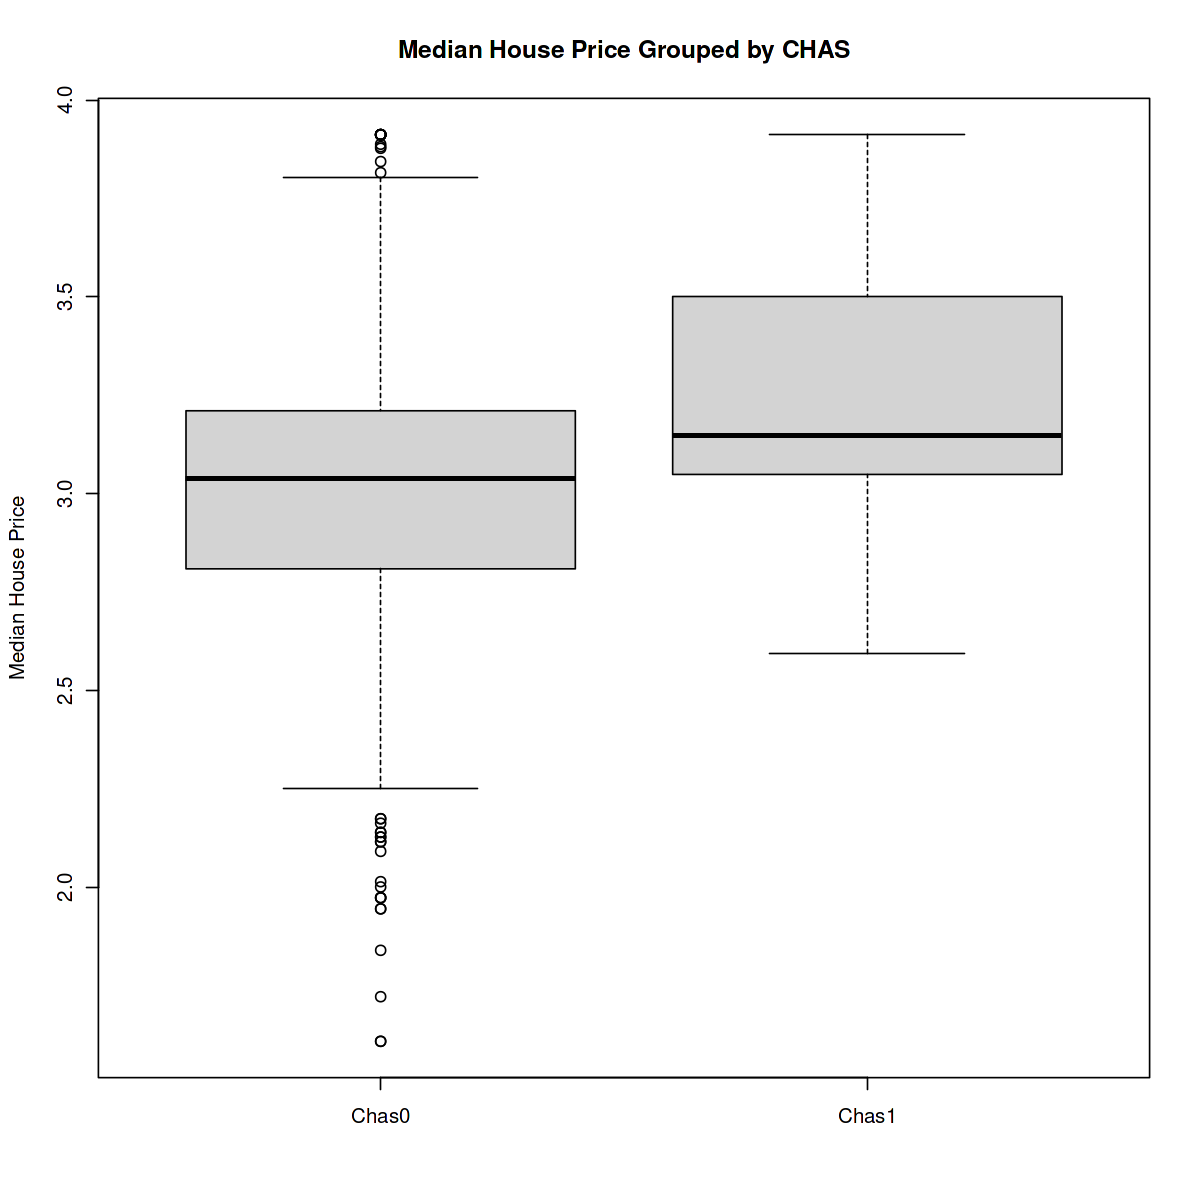

In [40]:
boxplot(group0,group1,names=c('Chas0','Chas1'),main='Median House Price Grouped by CHAS',ylab='Median House Price')

In [41]:
wilcox.test(group0,group1)



	Wilcoxon rank sum test with continuity correction

data:  group0 and group1
W = 5605.5, p-value = 0.001582
alternative hypothesis: true location shift is not equal to 0


p value is less than 0.005 thus we reject the null hypothesis, which means that both distributions are not equal


# **Data Splitting**

In [42]:
# Define the variables for the linear regression
X <- log_transformed_data[, c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT")]
Y <- log_transformed_data$PRICE

# Split the data into training and testing sets
set.seed(123)
train_index <- sample(1:nrow(log_transformed_data), 0.7 * nrow(log_transformed_data))
X_train <- X[train_index, ]
Y_train <- Y[train_index]
X_test <- X[-train_index, ]
Y_test <- Y[-train_index]

# **Linear regression**

In [43]:
# Fit the linear regression model
model <- lm(Y_train ~ ., data = cbind(Y_train, X_train))

summary(model)


Call:
lm(formula = Y_train ~ ., data = cbind(Y_train, X_train))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93408 -0.10459  0.00594  0.11353  0.83399 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.817549   0.546256  10.650  < 2e-16 ***
CRIM        -0.029018   0.013380  -2.169 0.030796 *  
ZN          -0.018499   0.010650  -1.737 0.083297 .  
INDUS       -0.005657   0.027528  -0.206 0.837297    
CHAS         0.114823   0.043902   2.615 0.009309 ** 
NOX         -0.350046   0.132782  -2.636 0.008767 ** 
RM           0.212943   0.129696   1.642 0.101543    
AGE          0.053251   0.027359   1.946 0.052429 .  
DIS         -0.135163   0.044367  -3.046 0.002497 ** 
RAD          0.098047   0.026740   3.667 0.000285 ***
TAX         -0.183590   0.056911  -3.226 0.001378 ** 
PTRATIO     -0.613868   0.117448  -5.227 3.02e-07 ***
B            0.054246   0.016622   3.263 0.001212 ** 
LSTAT       -0.455169   0.030971 -14.697  < 2e-16 ***
---
Si

In [44]:
# Make predictions
predictions <- predict(model, newdata = X_test)

In [45]:
# Calculate Mean Absolute Error (MAE)
mae <- mean(abs(Y_test - predictions))
print(paste("MAE:", mae))

# Calculate Mean Squared Error (MSE)
mse <- mean((Y_test - predictions)^2)
print(paste("MSE:", mse))

# Calculate Root Mean Squared Error (RMSE)
rmse <- sqrt(mean((Y_test - predictions)^2))
print(paste("RMSE:", rmse))

# Calculate R-squared
rsquared <- 1 - sum((Y_test - predictions)^2) / sum((Y_test - mean(Y_test))^2)
print(paste("R-squared:", rsquared))

[1] "MAE: 0.147744837643369"
[1] "MSE: 0.0360591555262819"
[1] "RMSE: 0.189892484122679"
[1] "R-squared: 0.767566617785437"


In [46]:
# Create a data frame with predicted and actual values
comparison_df <- data.frame(Predicted = predictions, Actual = Y_test)

# Print the first few rows of the dataframe
head(comparison_df)

,Predicted,Actual
,<dbl>,<dbl>
1,3.430997,3.178054
3,3.580726,3.546740
6,3.448980,3.356897
8,2.845423,3.299534
9,2.609359,2.803360
12,2.998697,2.939162


# **Linear Regression with Cross Validation**¶


In [47]:
library(caret)

# Define the control method for cross-validation
train_control <- trainControl(method="cv", number=10)

# Train the model using cross-validation with linear regression
model_lr <- train(Y_train ~ ., data=data.frame(X_train, Y_train), method="lm", trControl=train_control)

# Make predictions on the test set
predictions_lr <- predict(model_lr, newdata=data.frame(X_test))

# Calculate MSE for the test set
mse_lr <- mean((Y_test - predictions_lr)^2)
print(mse_lr)
postResample(predictions_lr, Y_test)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




[1] 0.03605916


RMSE  Rsquared       MAE 
0.1898925 0.7835280 0.1477448

# **Lasso Regression**

In [48]:
# Install and load the glmnet package
library(glmnet)

# Convert the data into a format suitable for glmnet
x_train <- as.matrix(X_train)
x_test <- as.matrix(X_test)

# Fit the Lasso regression model
lasso_model <- glmnet(x_train, Y_train, alpha = 1)

# Make predictions on the test set
lasso_pred <- predict(lasso_model, s = 0.01, newx = x_test)

Loading required package: Matrix

Loaded glmnet 4.1-8



In [49]:
# Calculate Mean Absolute Error (MAE)
mae <- mean(abs(Y_test - lasso_pred))
print(paste("MAE:", mae))

# Calculate Mean Squared Error (MSE)
mse <- mean((Y_test - lasso_pred)^2)
print(paste("MSE:", mse))

# Calculate Root Mean Squared Error (RMSE)
rmse <- sqrt(mean((Y_test - lasso_pred)^2))
print(paste("RMSE:", rmse))

# Calculate R-squared
rsquared <- 1 - sum((Y_test - lasso_pred)^2) / sum((Y_test - mean(Y_test))^2)
print(paste("R-squared:", rsquared))

[1] "MAE: 0.150140350742194"
[1] "MSE: 0.0386555597248228"
[1] "RMSE: 0.196610171976993"
[1] "R-squared: 0.750830479607628"


# **Lasso Regression with Cross Validation**


In [50]:
library(glmnet)

# Perform k-fold cross-validation to find the optimal lambda value
set.seed(123) # For reproducibility
cv_model_lasso <- cv.glmnet(as.matrix(X_train), Y_train, alpha = 1)

# Fit the lasso model using the best lambda value on the training data
lasso_model <- glmnet(as.matrix(X_train), Y_train, alpha = 1, lambda = cv_model_lasso$lambda.min)

# Make predictions on the test set
predictions_lasso <- predict(lasso_model, s = cv_model_lasso$lambda.min, newx = as.matrix(X_test))

# Calculate performance metrics
mse_lasso <- mean((Y_test - predictions_lasso)^2)
mse_lasso
postResample(predictions_lasso, Y_test)

[1] 0.03602125

RMSE  Rsquared       MAE 
0.1897926 0.7834547 0.1474588

# Decision Tree

n= 354 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 354 60.64189000 3.023093  
   2) LSTAT>=2.694965 112 12.38021000 2.595259  
     4) CRIM>=2.010185 52  4.82937600 2.377035  
       8) CRIM>=3.207524 7  0.52216730 1.934882 *
       9) CRIM< 3.207524 45  2.72583600 2.445815  
        18) LSTAT>=2.985918 28  1.67595100 2.345253  
          36) NOX>=-0.3930601 19  0.76600920 2.234571 *
          37) NOX< -0.3930601 9  0.18580190 2.578915 *
        19) LSTAT< 2.985918 17  0.30036090 2.611446 *
     5) CRIM< 2.010185 60  2.92835200 2.784387  
      10) NOX>=-0.6330802 47  2.06205600 2.728377  
        20) LSTAT>=2.890085 23  1.09712800 2.609288 *
        21) LSTAT< 2.890085 24  0.32613200 2.842505 *
      11) NOX< -0.6330802 13  0.18579230 2.986883 *
   3) LSTAT< 2.694965 242 18.27313000 3.221099  
     6) RM< 1.915524 186  6.26670100 3.118014  
      12) LSTAT>=2.039268 129  3.87117400 3.064417 *
      13) LSTAT< 2.039268 57  1.18631400 3.239312 *
     7) RM>

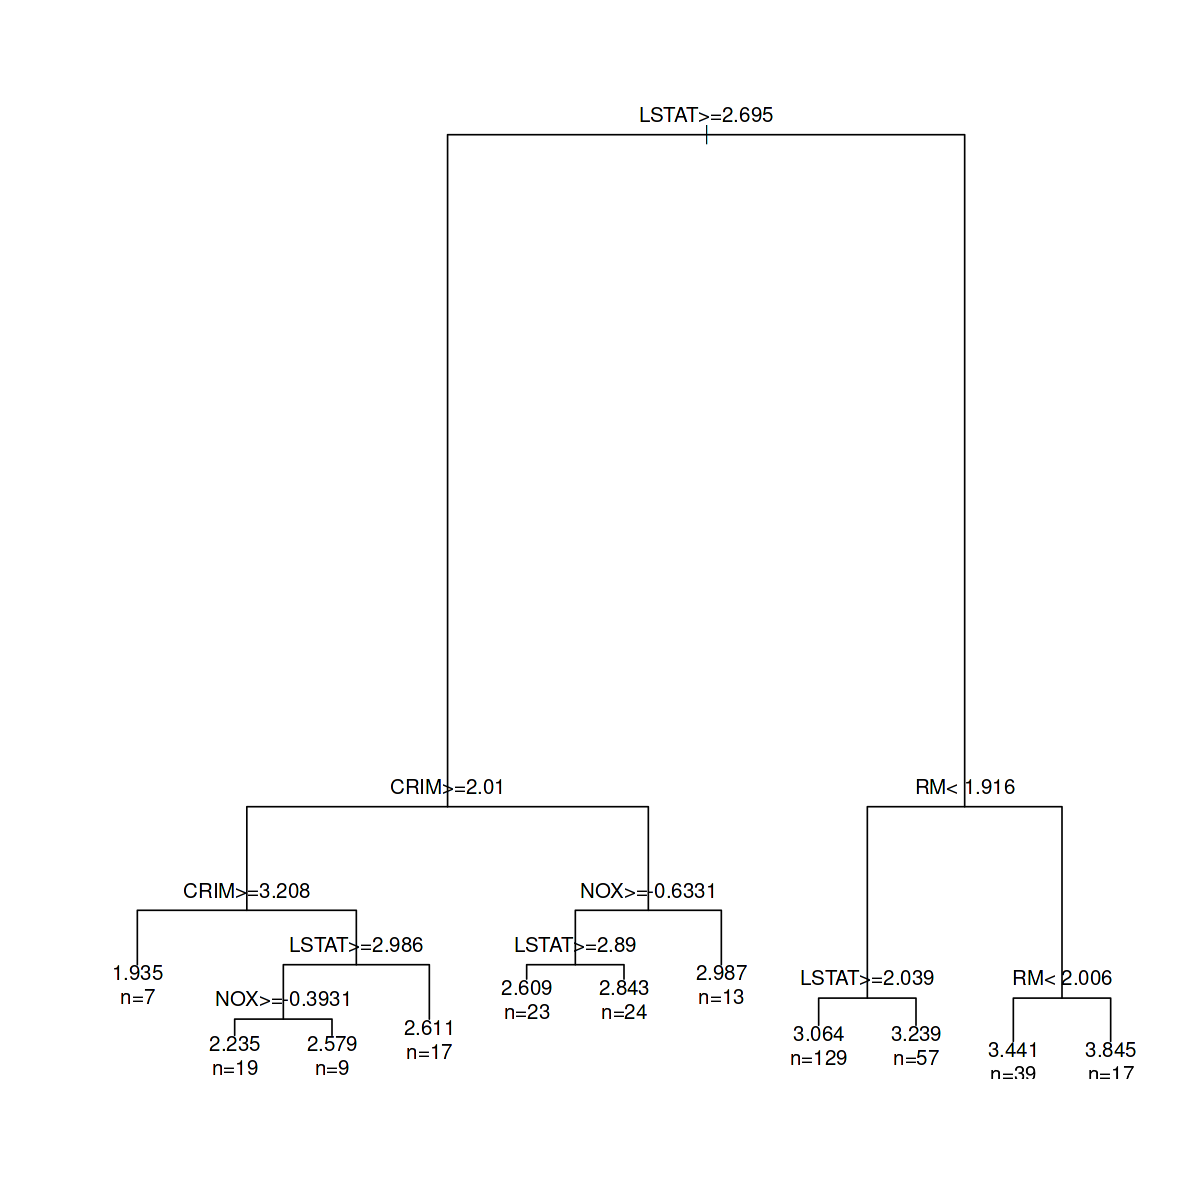

In [51]:
# Load the necessary library
library(rpart)

# Fit the decision tree model
fit <- rpart(Y_train ~ ., data = data.frame(X_train, Y_train), method = "anova")

# Print the decision tree model
print(fit)

# Plot the decision tree
plot(fit)
text(fit, use.n = TRUE)

# Predict on the test set
predictions <- predict(fit, newdata = data.frame(X_test))




In [52]:
# Calculate Mean Absolute Error (MAE)
mae <- mean(abs(Y_test - predictions))
print(paste("MAE:", mae))

# Calculate Mean Squared Error (MSE)
mse <- mean((Y_test - predictions)^2)
print(paste("MSE:", mse))

# Calculate Root Mean Squared Error (RMSE)
rmse <- sqrt(mean((Y_test - predictions)^2))
print(paste("RMSE:", rmse))

# Calculate R-squared
rsquared <- 1 - sum((Y_test - predictions)^2) / sum((Y_test - mean(Y_test))^2)
print(paste("R-squared:", rsquared))

[1] "MAE: 0.15766232191364"
[1] "MSE: 0.0463993583549772"
[1] "RMSE: 0.215405102899112"
[1] "R-squared: 0.700914798540628"


# **Decision Tree with Cross Validation**

In [53]:
# Assuming X_Train, Y_Train, X_Test, and Y_Test are already defined

# Define the control method for cross-validation
train_control <- trainControl(method="cv", number=10)

# Train the model using cross-validation with Decision Tree
model_dt <- train(Y_train ~ ., data=data.frame(X_train, Y_train), method="rpart", trControl=train_control)

# Make predictions on the test set
predictions_dt <- predict(model_dt, newdata=data.frame(X_test))

# Calculate performance metrics
postResample(predictions_dt, Y_test)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


RMSE  Rsquared       MAE 
0.2605770 0.5903414 0.1991133

# SVM

In [54]:
# Load the necessary library
library(e1071)

# Fit the SVM model for regression
svm_model <- svm(Y_train ~ ., data = data.frame(X_train, Y_train))

# Print the SVM model details
print(svm_model)

# Predict on the test set using the SVM model
svm_predictions <- predict(svm_model, newdata = data.frame(X_test))


Call:
svm(formula = Y_train ~ ., data = data.frame(X_train, Y_train))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.07692308 
    epsilon:  0.1 


Number of Support Vectors:  239



In [55]:
# Calculate Mean Absolute Error (MAE)
mae <- mean(abs(Y_test - svm_predictions))
print(paste("MAE:", mae))

# Calculate Mean Squared Error (MSE)
mse <- mean((Y_test - svm_predictions)^2)
print(paste("MSE:", mse))

# Calculate Root Mean Squared Error (RMSE)
rmse <- sqrt(mean((Y_test - svm_predictions)^2))
print(paste("RMSE:", rmse))

# Calculate R-squared
rsquared <- 1 - sum((Y_test - svm_predictions)^2) / sum((Y_test - mean(Y_test))^2)
print(paste("R-squared:", rsquared))

[1] "MAE: 0.107904707276515"
[1] "MSE: 0.0256482202794339"
[1] "RMSE: 0.160150617480651"
[1] "R-squared: 0.834674370480255"


# **SVR with Cross Validation**

In [56]:
# Define the control method for cross-validation
train_control <- trainControl(method="cv", number=10)

# Train the model using cross-validation with SVM
model_svm <- train(Y_train ~ ., data=data.frame(X_train, Y_train), method="svmRadial", trControl=train_control)

# Make predictions on the test set
predictions_svm <- predict(model_svm, newdata=data.frame(X_test))

# Calculate performance metrics
postResample(predictions_svm, Y_test)

RMSE  Rsquared       MAE 
0.1655019 0.8271779 0.1117337

# KNN

In [57]:
# Load the necessary library
library(kknn)

# Scale the data
scaled_X_train <- scale(X_train)
scaled_X_test <- scale(X_test)

# Fit the KNN model
set.seed(123) # for reproducibility
knn_fit <- train.kknn(Y_train ~ ., data = data.frame(scaled_X_train, Y_train), kmax = 20)

# Find the best k value
best_k <- knn_fit$best.parameters$k

# Predict on the test set using the KNN model
knn_predictions <- predict(knn_fit, newdata = data.frame(scaled_X_test))


Attaching package: ‘kknn’


The following object is masked from ‘package:caret’:

    contr.dummy




In [58]:
# Calculate Mean Absolute Error (MAE)
mae <- mean(abs(Y_test - knn_predictions))
print(paste("MAE:", mae))

# Calculate Mean Squared Error (MSE)
mse <- mean((Y_test - knn_predictions)^2)
print(paste("MSE:", mse))

# Calculate Root Mean Squared Error (RMSE)
rmse <- sqrt(mean((Y_test - knn_predictions)^2))
print(paste("RMSE:", rmse))

# Calculate R-squared
rsquared <- 1 - sum((Y_test - knn_predictions)^2) / sum((Y_test - mean(Y_test))^2)
print(paste("R-squared:", rsquared))

[1] "MAE: 0.142599654328807"
[1] "MSE: 0.0364098898969362"
[1] "RMSE: 0.190813757095594"
[1] "R-squared: 0.76530582229979"


# **KNN with Cross Validation**


In [59]:
# Define the control method for cross-validation
train_control <- trainControl(method="cv", number=10)

# Train the model using cross-validation with KNN
model_knn <- train(Y_train ~ ., data=data.frame(X_train, Y_train), method="knn", trControl=train_control)

# Make predictions on the test set
predictions_knn <- predict(model_knn, newdata=data.frame(X_test))

# Calculate performance metrics
postResample(predictions_knn, Y_test)

RMSE  Rsquared       MAE 
0.2188096 0.7039816 0.1630524

# Stacking Ensemble


In [60]:
# Combine predictions with actual labels for the test set
stacked_predictions_test <- data.frame(Y_test = Y_test,
                                       knn = predict(knn_fit, newdata = data.frame(scaled_X_test)),
                                       svm = predict(svm_model, newdata = data.frame(X_test)),
                                       tree = predict(fit, newdata = data.frame(X_test)),
                                       lasso = predict(lasso_model, s = 0.01, newx = x_test))

# Train a meta-model on the combined predictions
meta_model <- lm(Y_test ~ ., data = stacked_predictions_test)

# Make predictions on the test set using the meta-model
meta_predictions <- predict(meta_model, newdata = stacked_predictions_test)




In [61]:
# Calculate Mean Absolute Error (MAE) for the meta-model
meta_mae <- mean(abs(stacked_predictions_test$Y_test - meta_predictions))
print(paste("Stacking Ensemble - Meta-model MAE:", meta_mae))

# Calculate Mean Squared Error (MSE) for the meta-model
meta_mse <- mean((stacked_predictions_test$Y_test - meta_predictions)^2)
print(paste("Stacking Ensemble - Meta-model MSE:", meta_mse))

# Calculate Root Mean Squared Error (RMSE) for the meta-model
meta_rmse <- sqrt(mean((stacked_predictions_test$Y_test - meta_predictions)^2))
print(paste("Stacking Ensemble - Meta-model RMSE:", meta_rmse))

# Calculate R-squared for the meta-model
meta_rsquared <- 1 - sum((stacked_predictions_test$Y_test - meta_predictions)^2) / sum((stacked_predictions_test$Y_test - mean(stacked_predictions_test$Y_test))^2)
print(paste("Stacking Ensemble - Meta-model R-squared:", meta_rsquared))


[1] "Stacking Ensemble - Meta-model MAE: 0.110719080842745"
[1] "Stacking Ensemble - Meta-model MSE: 0.0230578633653692"
[1] "Stacking Ensemble - Meta-model RMSE: 0.151848158913334"
[1] "Stacking Ensemble - Meta-model R-squared: 0.851371528522132"
